# Code to prepare results for the EUMETSAT talk (september 2023)

### Training of the CNN for self-supervised algorithm for classifying satellite images




In [1]:
# Import relevant modules
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cfeature           # import features
import uuid
from scipy import interpolate
import scipy.io
from glob import glob
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib

/Users/claudia/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path_to_csv = '/Volumes/Extreme SSD/work/006_projects/009_EXPATS/data/'
dfp = pd.read_csv(path_to_csv+'2015_may-sep_alps_128_k12_physical_properties.csv')
csv_data = dfp.to_xarray()

In [3]:
csv_data = csv_data.set_coords(("label"))
csv_data

<xarray.Dataset>
Dimensions:        (index: 60257)
Coordinates:
  * index          (index) int64 0 1 2 3 4 5 ... 60252 60253 60254 60255 60256
    label          (index) int64 1 10 1 5 5 10 5 5 5 10 ... 6 9 9 9 6 9 6 6 7 6
Data variables: (12/24)
    file_location  (index) object '/p/scratch/deepacf/kiste/DC/dataset/paula/...
    datetime       (index) object '20150501t0600' ... '20150930t1630'
    tsne-x         (index) float64 0.7447 0.8544 0.7271 ... 0.1342 0.1294 0.1978
    tsne-y         (index) float64 0.2729 0.1938 0.472 ... 0.1927 0.6134 0.2026
    cot_mean       (index) float64 6.188 19.68 5.522 ... 0.2153 0.05447 0.07323
    cot_std        (index) float64 10.71 21.99 6.946 ... 3.954 0.6791 2.097
    ...             ...
    trs_mean       (index) float64 254.7 278.8 236.6 294.2 ... 58.74 63.17 54.14
    trs_std        (index) float64 61.91 19.79 63.18 59.05 ... 7.295 4.837 6.191
    sds_mean       (index) float64 188.5 64.12 166.0 135.3 ... 74.26 77.04 76.96
    sds_std        (index) float64 69.09 21.9 56.8 53.11 ... 7.494 5.721 7.559
    sds_cs_mean    (index) float64 344.6 251.3 294.9 321.8 ... 75.12 77.4 77.4
    sds_cs_std     (index) float64 7.25 5.138 8.749 15.22 ... 6.107 4.691 7.055

In [19]:
# selecting data of classes separated
class_1 = csv_data.where(csv_data.label.values==0)
class_2 = csv_data.where(csv_data.label.values==1)
class_3 = csv_data.where(csv_data.label.values==2)
class_4 = csv_data.where(csv_data.label.values==3)
class_5 = csv_data.where(csv_data.label.values==4)
class_6 = csv_data.where(csv_data.label.values==5)
class_7 = csv_data.where(csv_data.label.values==6)
class_8 = csv_data.where(csv_data.label.values==7)
class_9 = csv_data.where(csv_data.label.values==8)
class_10 = csv_data.where(csv_data.label.values==9)
class_11 = csv_data.where(csv_data.label.values==10)
class_12 = csv_data.where(csv_data.label.values==11)


# assigning colors to the classes
Dict_classes = {'color_12':'#B8000F',
                'name_12':'ABL 1',
                'color_4':'#D53A47',
                'name_4':'ABL 2',
                'color_5':'#F37C86',
                'name_5':'ABL 3', 
                'color_6':'#93C9EF',
                'name_6':'thick cirrus',
                'color_3':'#B0D9F6',
                'name_3':'thin cirrus',
                'color_2':'#000000',
                'name_2':'transition cloud', 
                'color_10':'#D5DEE5',
                'name_10':'mixed phase 2',
                'color_8':'#A1A7AC',
                'name_8':'mixed phase 1',
                'color_7':'#707579',
                'name_7':'mixed phase 3',
                'color_9':'#5790B4',
                'name_9':'convective 1',
                'color_11':'#026BAC',
                'name_11':'convective 2',
                'color_1':'#059DFC', 
                'name_1':'convective 3',
               }

#Dict_classes = {'color_8':'#E63946',
#                'color_10':'#EC8A91',
#                'name_8':'boundary layer 1',
#                'name_10':'boundary layer 2',
#                'color_7':'#ECBDC0',
#                'name_7':'boundary layer 3',
#                'color_5':'#A7D5F1',
#                'color_9':'#5790B4',
#                'color_12':'#3FA8E8',
#                'color_4':'#1E7DB8',
#                'color_1':'#059DFC',
#                'color_11':'#026BAC',
#                'color_2':'#024066',
#                'color_6':'#BCC1C4',
#                'color_3':'#5E6061'
#               }

Dict_PBL = {'color_12':'#B8000F',
            'name_12':'ABL 1',
            'color_4':'#D53A47',
            'name_4':'ABL 2',
            'color_5':'#F37C86',
            'name_5':'ABL 3',
}

Dict_cirrus = {'color_6':'#BCC1C4',
               'name_6':'thick cirrus',
               'color_3':'#5E6061',
               'name_3':'thin cirrus',
    
}

Dict_transition = {'color_2':'#000000',
                   'name_2':'transition cloud',
}

Dict_mixed_phase = {'color_10':'#D5DEE5',
                    'name_10':'mixed phase 2',
                    'color_8':'#A1A7AC',
                    'name_8':'mixed phase 1',
                    'color_7':'#707579',
                    'name_7':'mixed phase 3',
    
}

Dict_convective_clouds = {'color_9':'#5790B4',
                          'name_9':'convective 1',
                          'color_11':'#026BAC',
                          'name_11':'convective 2',
                          'color_1':'#059DFC', 
                          'name_1':'convective 3',

}

grey_axes_flag = 1

### Plot of scatter plots for the different classes of cloud top temperature, cloud water path for the different classes (colors), or cloud top pressure/height vs cloud effective radius

0
#059DFC
1
#000000
2
#B0D9F6
3
#D53A47
4
#F37C86
5
#93C9EF
6
#707579
7
#A1A7AC
8
#5790B4
9
#D5DEE5
10
#026BAC
11
#B8000F


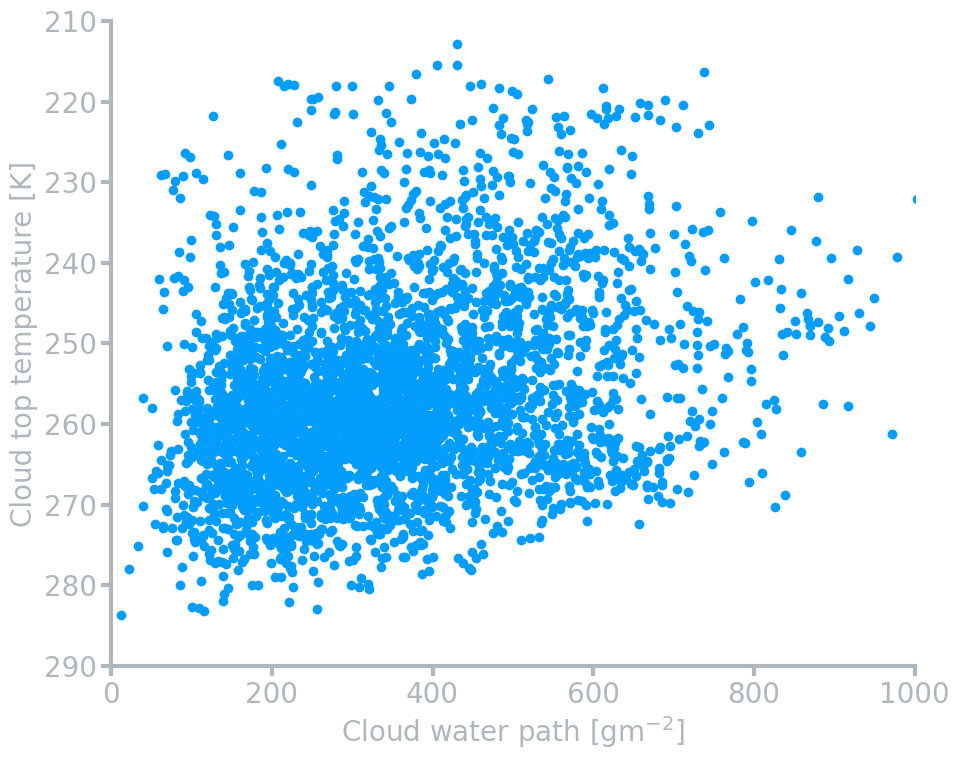

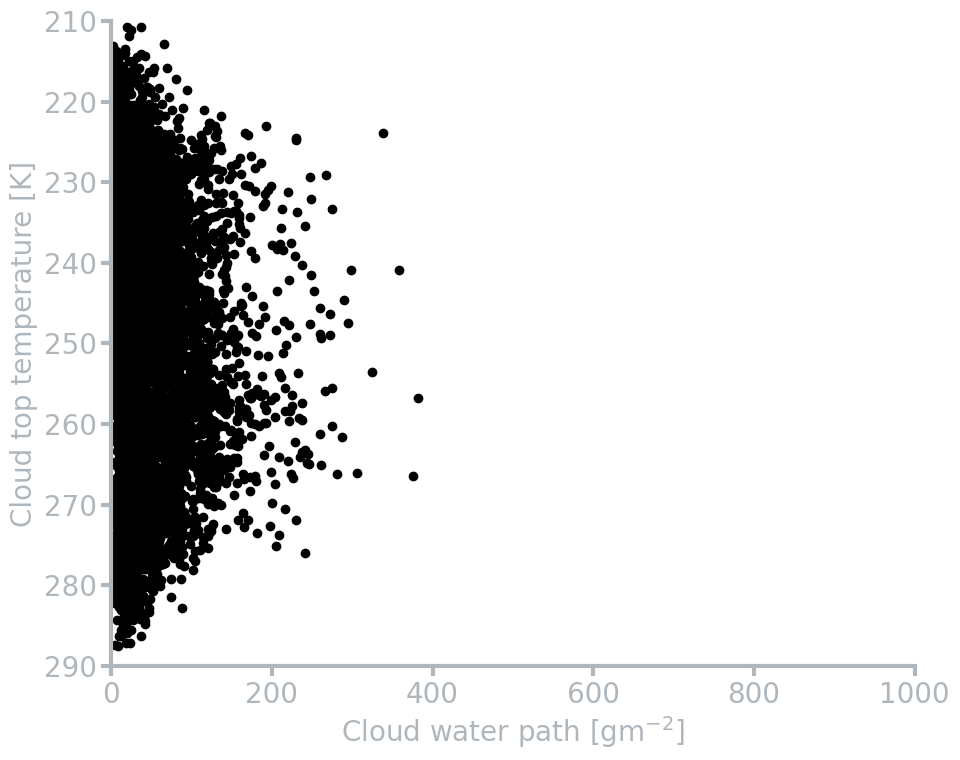

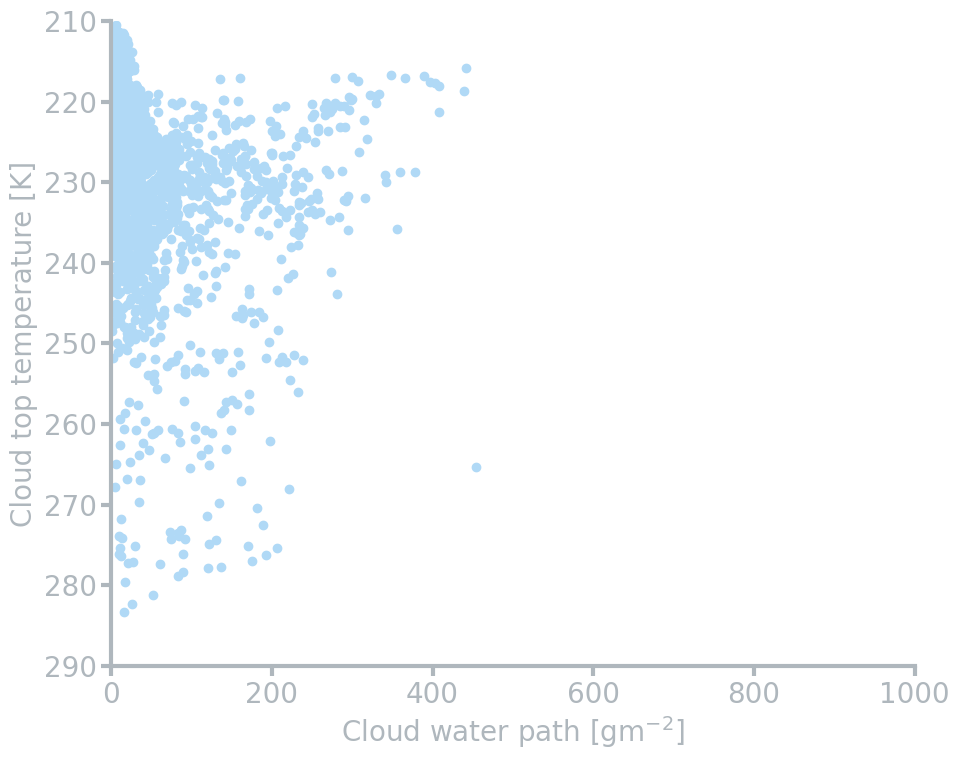

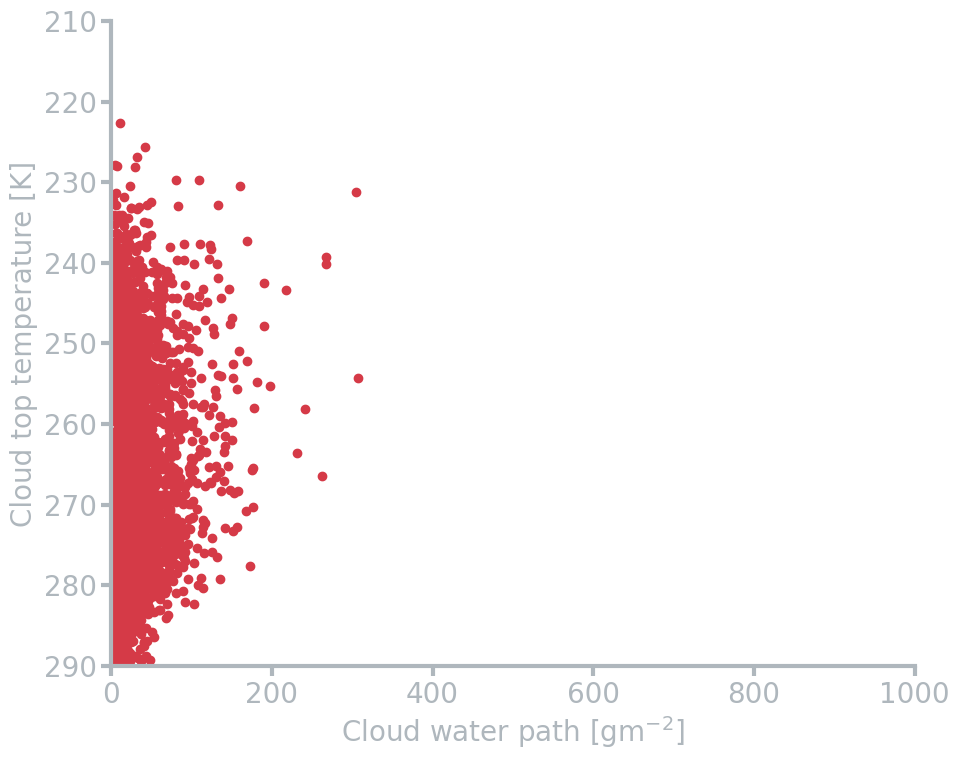

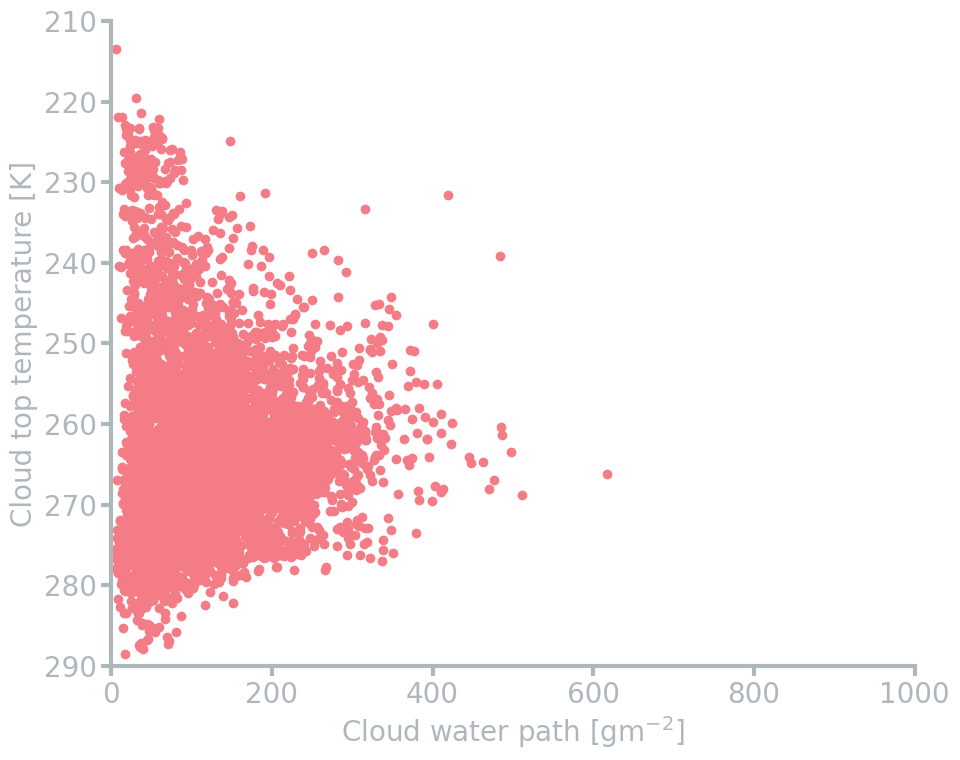

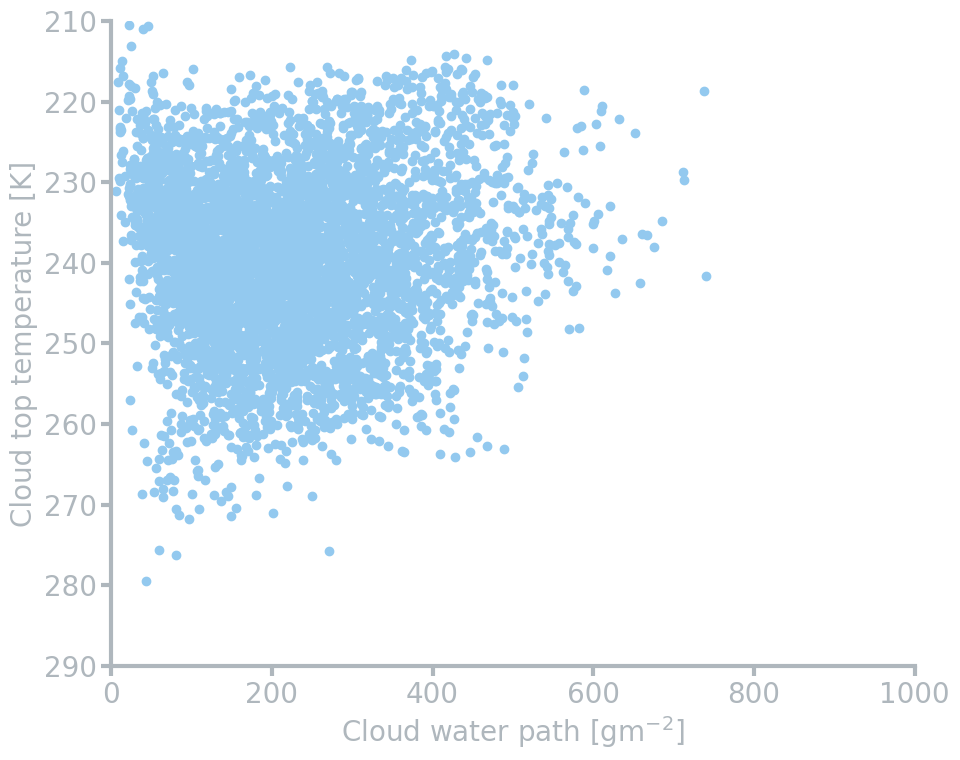

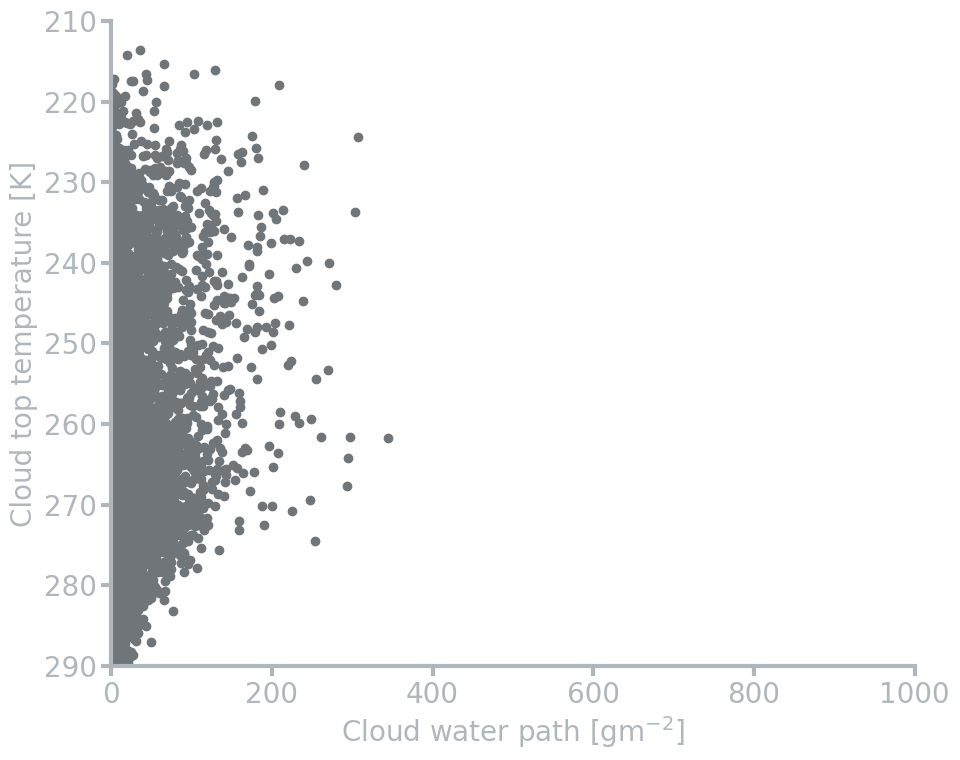

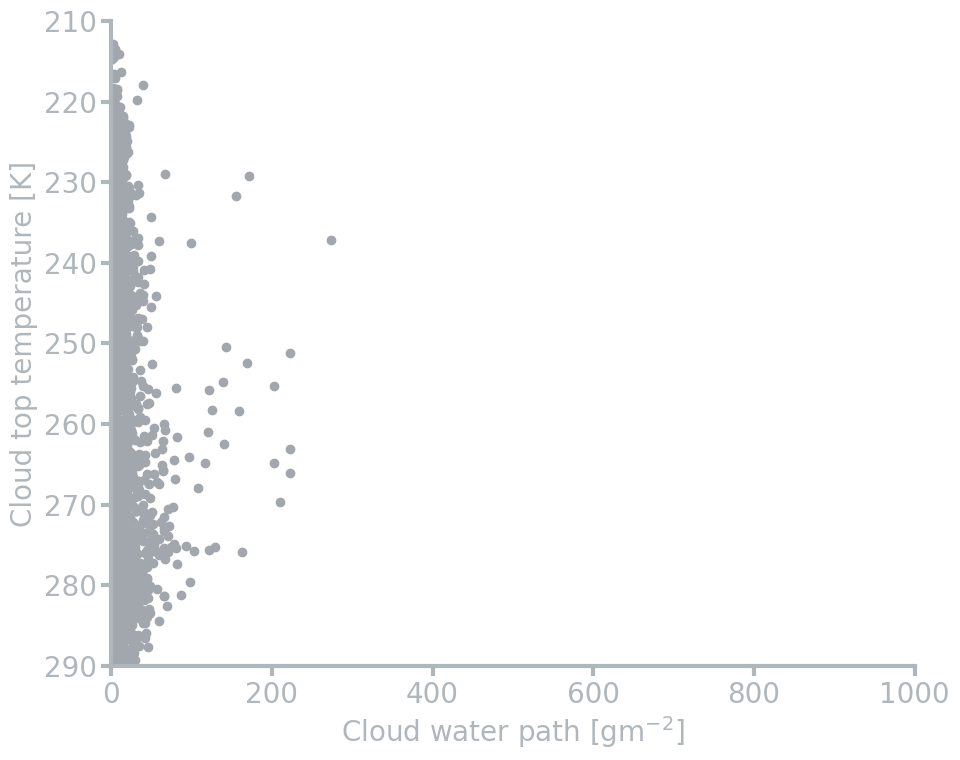

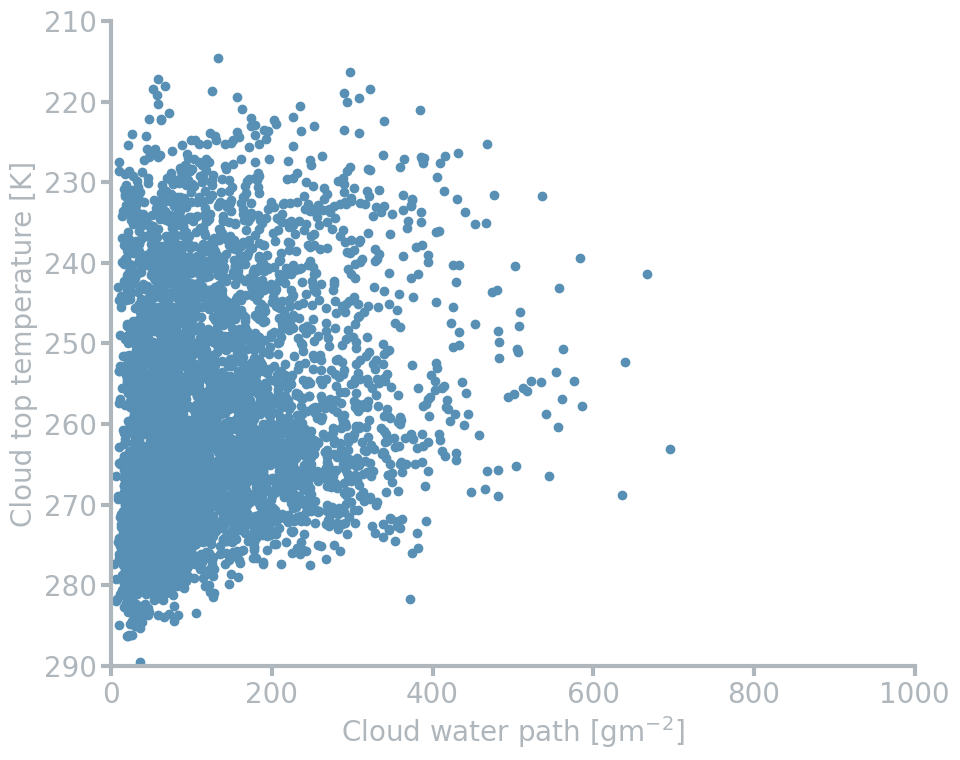

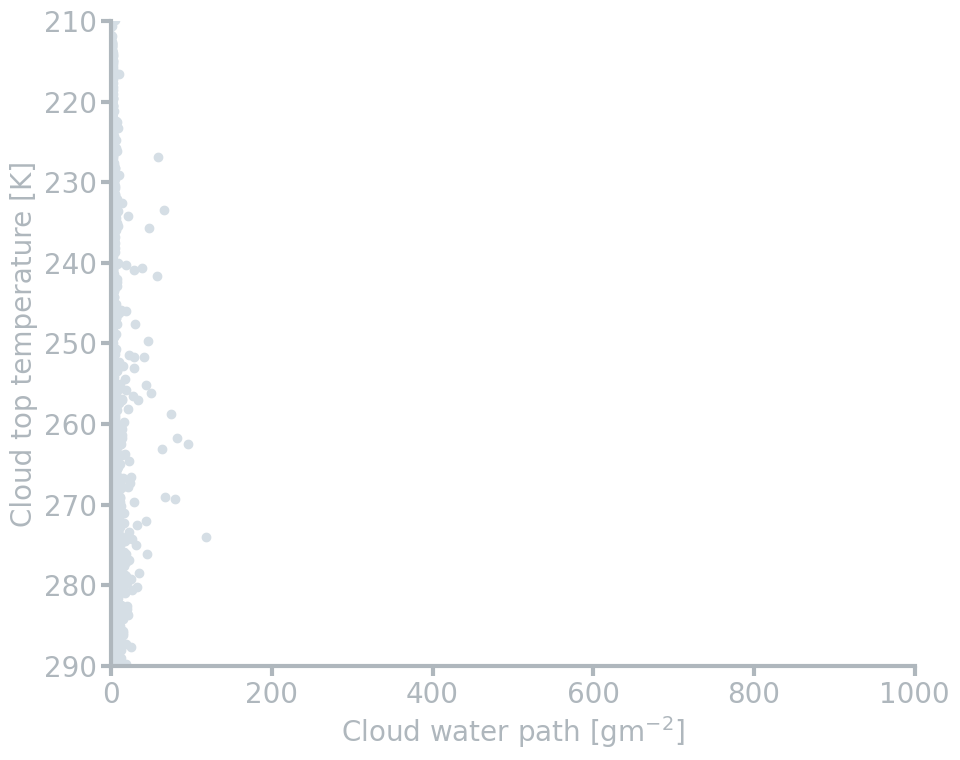

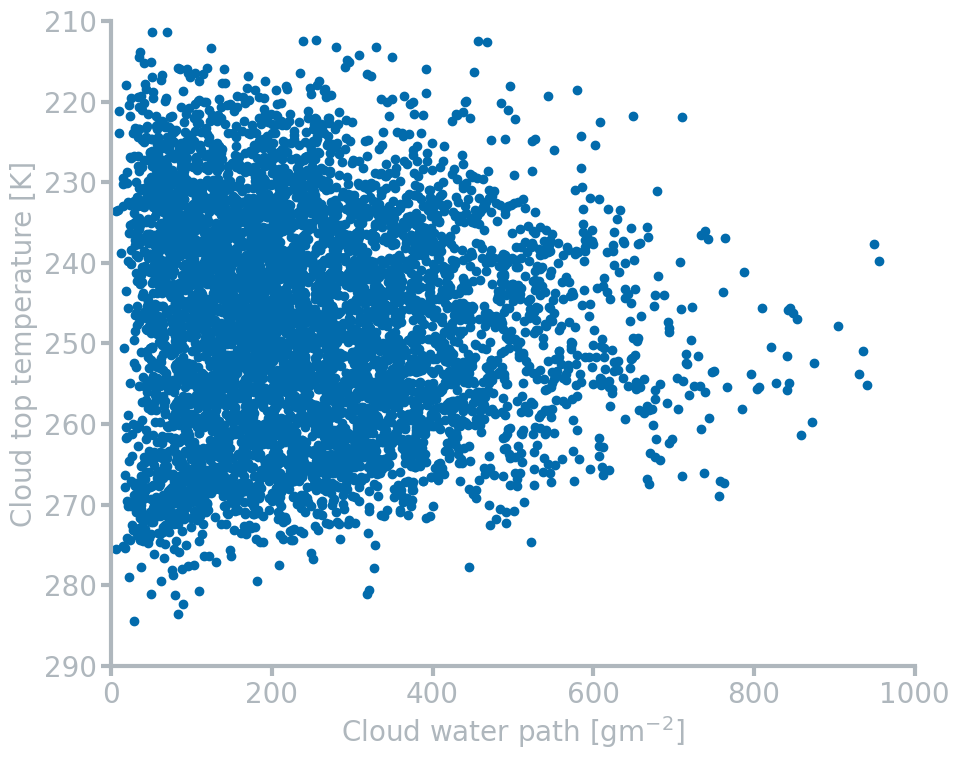

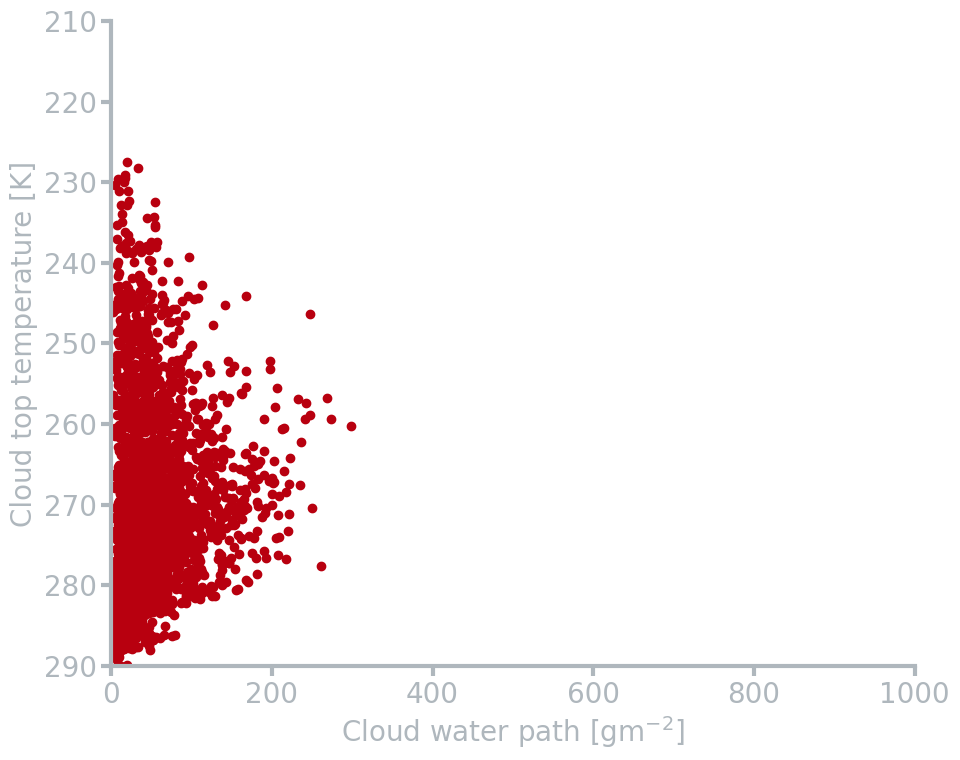

In [20]:
# define list of classes to plot
class_list = [class_1, 
              class_2, 
              class_3, 
              class_4, 
              class_5, 
              class_6, 
              class_7, 
              class_8, 
              class_9, 
              class_10, 
              class_11, 
              class_12]

color_list = [Dict_classes['color_1'], 
              Dict_classes['color_2'], 
              Dict_classes['color_3'], 
              Dict_classes['color_4'], 
              Dict_classes['color_5'], 
              Dict_classes['color_6'], 
              Dict_classes['color_7'], 
              Dict_classes['color_8'], 
              Dict_classes['color_9'], 
              Dict_classes['color_10'], 
              Dict_classes['color_11'], 
              Dict_classes['color_12']]

def plot_scatter_1(class_dataset, color_class):
    
    # Reading d ata from the dataset 
    y = class_dataset.ctt_mean.values
    x = class_dataset.cwp_mean.values
    
    # selecting non nan values
    i_good = np.where(~np.isnan(x) * ~np.isnan(y))[0]

    # Creating a scatter plot with different colors
    plt.scatter(x[i_good], y[i_good], c=color_class, vmin=0, vmax=12)

    return()

for ind_class, class_sel in enumerate(class_list):
    
    print(ind_class)
    
    # starting the figure
    fig, axs = plt.subplots(figsize=(10,8))
    plt.gcf().subplots_adjust(bottom=0.1)
    path_out = path_to_csv
    dict_plot_settings = {
            'labelsizeaxes':20,
            'fontSizeTitle':20,
            'fontSizeX'    :20,
            'fontSizeY'    :20,
            'cbarAspect'   :20,
            'fontSizeCbar' :20,
            'rcparams_font':['Tahoma'],
            'savefig_dpi'  :100,
            'font_size'    :20, 
            'grid'         :True}
    labelsizeaxes   = dict_plot_settings['labelsizeaxes']
    fontSizeTitle   = dict_plot_settings['fontSizeTitle']
    fontSizeX       = dict_plot_settings['fontSizeX']
    fontSizeY       = dict_plot_settings['fontSizeY']
    cbarAspect      = dict_plot_settings['cbarAspect']
    fontSizeCbar    = dict_plot_settings['fontSizeCbar']
    plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
    grid = dict_plot_settings['grid']
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
    axs.spines["bottom"].set_linewidth(3)
    axs.spines["left"].set_linewidth(3)
    axs.tick_params(which='minor', length=5, width=2)
    axs.tick_params(which='major', length=7, width=3)
    if grey_axes_flag == 1:
        axs.spines['bottom'].set_color('#AFB7BD')
        axs.xaxis.label.set_color('#AFB7BD')
        axs.tick_params(axis='x', colors='#AFB7BD')
        axs.spines['left'].set_color('#AFB7BD')
        axs.yaxis.label.set_color('#AFB7BD')
        axs.tick_params(axis='y', colors='#AFB7BD')
        
    
    # reading information of the class
    class_color = color_list[ind_class]
    print(class_color)
    plot_scatter_1(class_sel, class_color)
    class_sel_name = 'class_'+str(ind_class+1)
    #plot_scatter(class_2, Dict_classes['color_2'])
    #plot_scatter(class_4, Dict_classes['color_4'])
    #plot_scatter(class_5, Dict_classes['color_5'])
    #plot_scatter(class_11, Dict_classes['color_11'])
    #plot_scatter(class_12, Dict_classes['color_12'])
    #plot_scatter(class_9, Dict_classes['color_9'])

    # Add labels and a title
    plt.ylabel('Cloud top temperature [K]')
    plt.xlabel('Cloud water path [gm$^{-2}$]')
    plt.xlim(0., 1000.)
    plt.ylim(290., 210.)

    # Show the plot and save it to png
    plt.tight_layout()
    if grey_axes_flag == 1:
        figure_name = path_out+'/grey_axes/'+class_sel_name+'_cht_cwp_scatter_plot.png'
    else:
        figure_name = path_out+class_sel_name+'_cht_cwp_scatter_plot.png'
     
    plt.savefig(figure_name, bbox_inches='tight', transparent=True)
    
    
    ind_class = ind_class + 1
    

0
#059DFC
1
#000000
2
#B0D9F6
3
#D53A47
4
#F37C86
5
#93C9EF
6
#707579
7
#A1A7AC
8
#5790B4
9
#D5DEE5
10
#026BAC
11
#B8000F


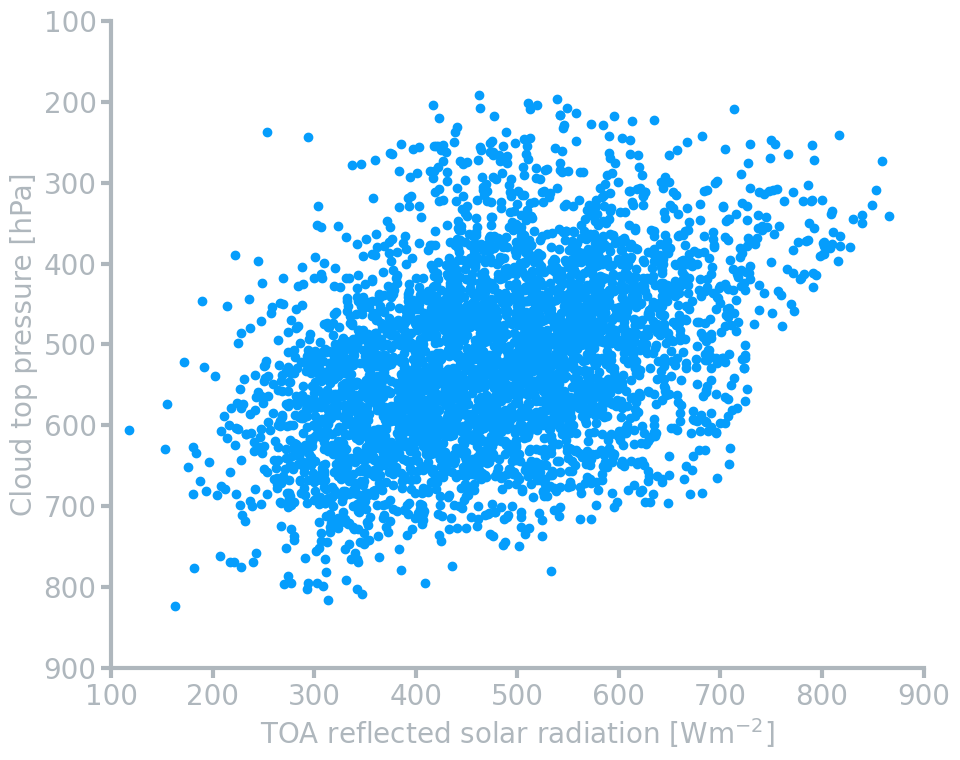

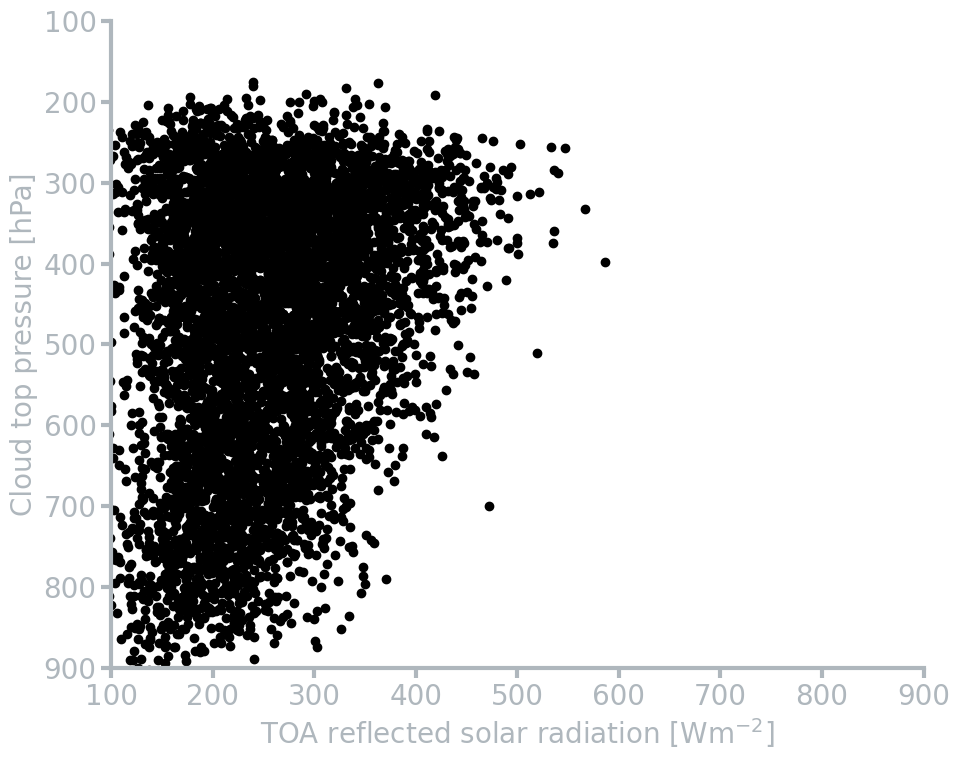

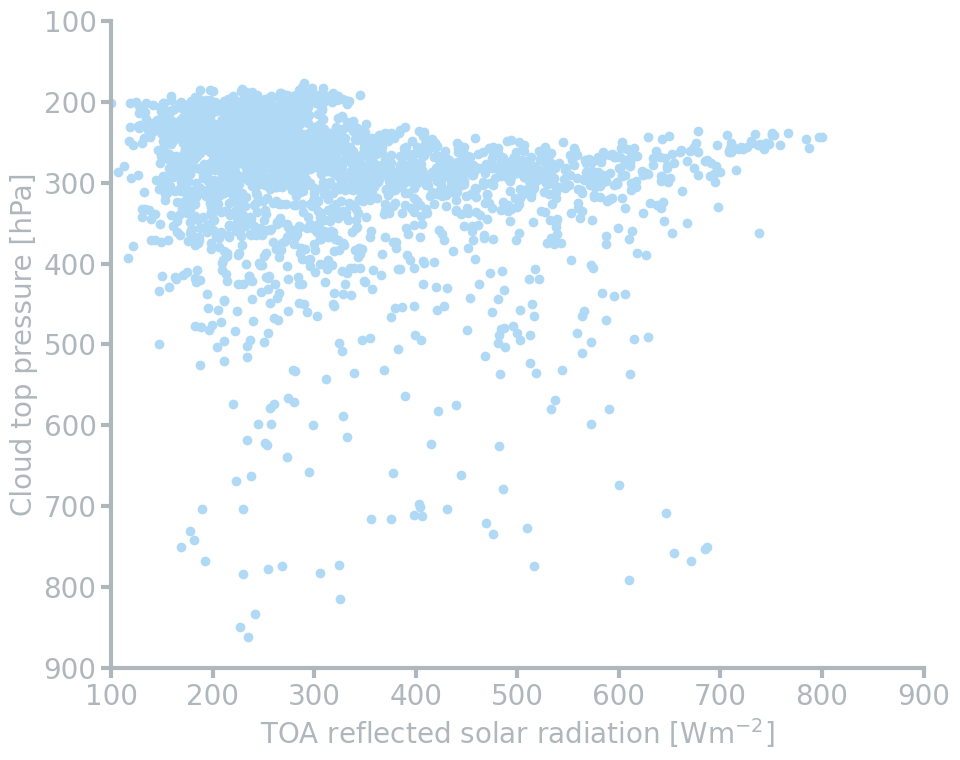

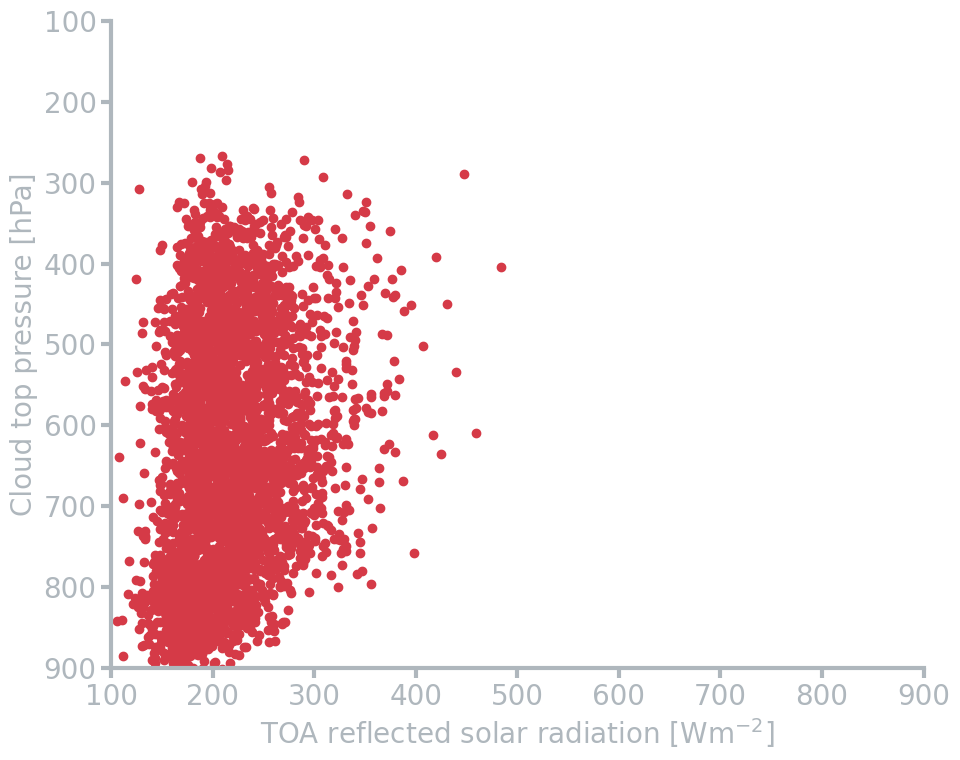

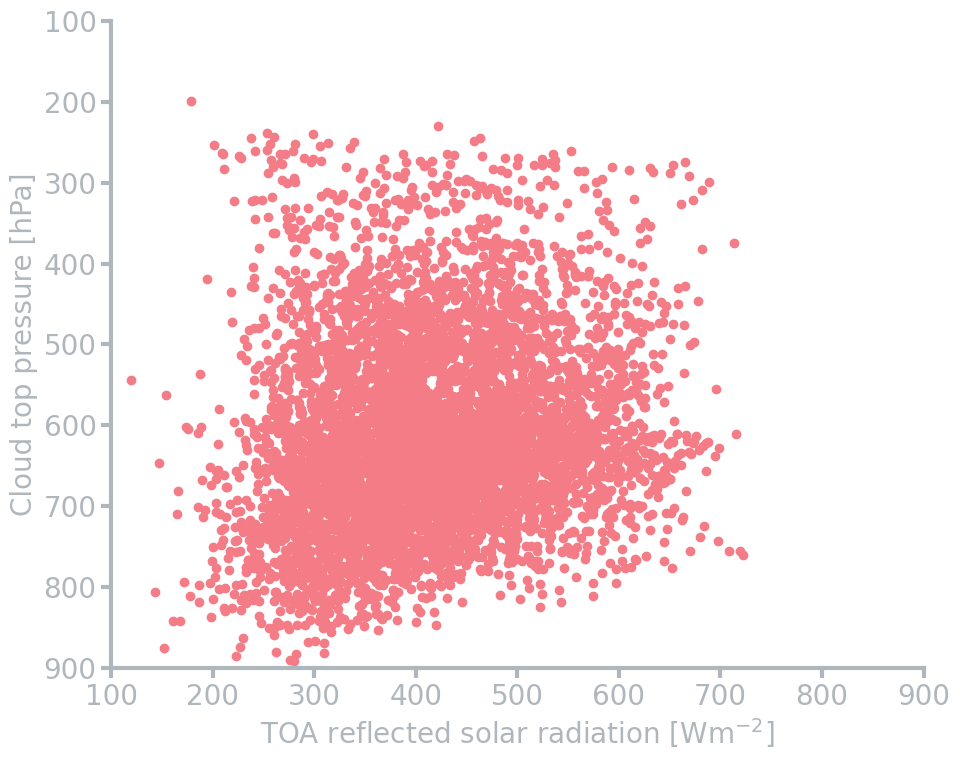

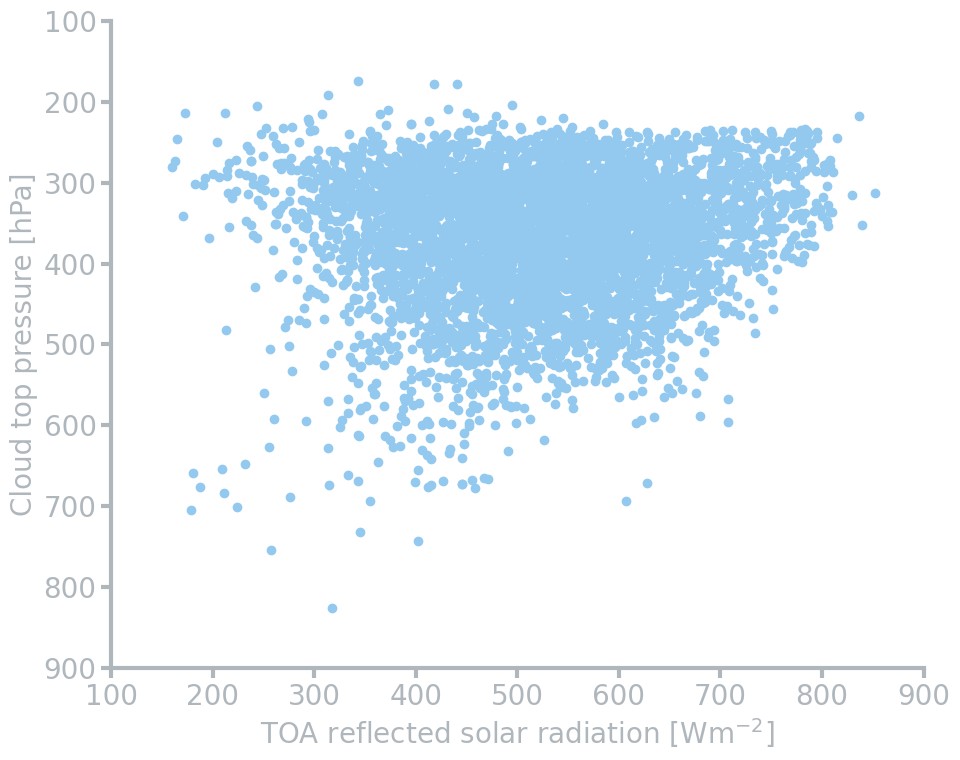

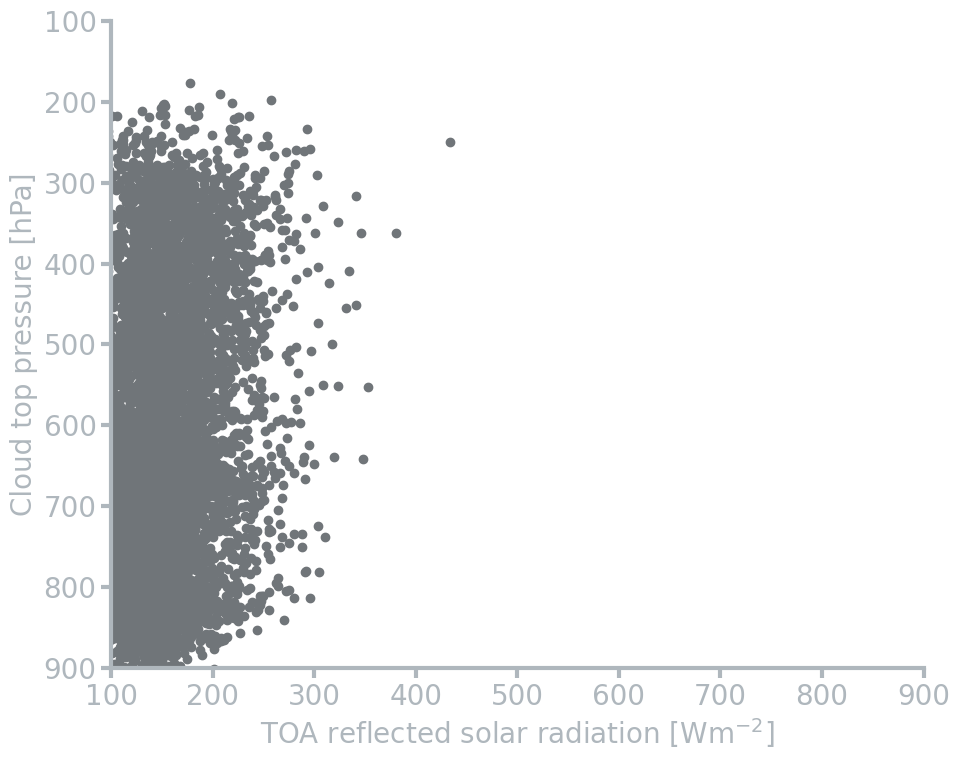

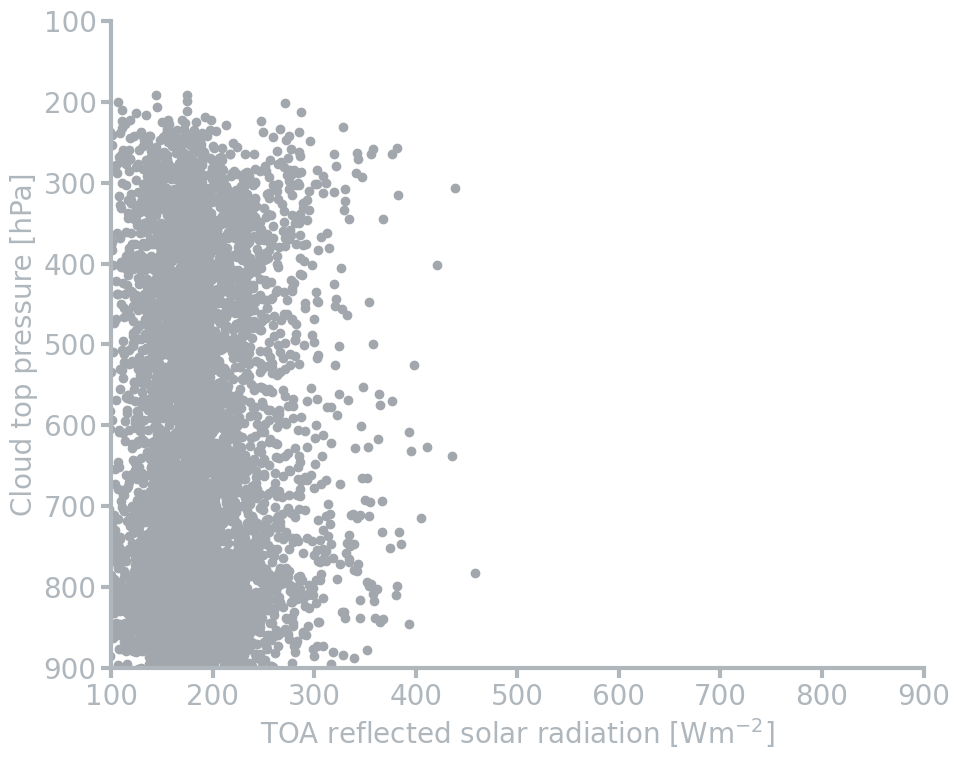

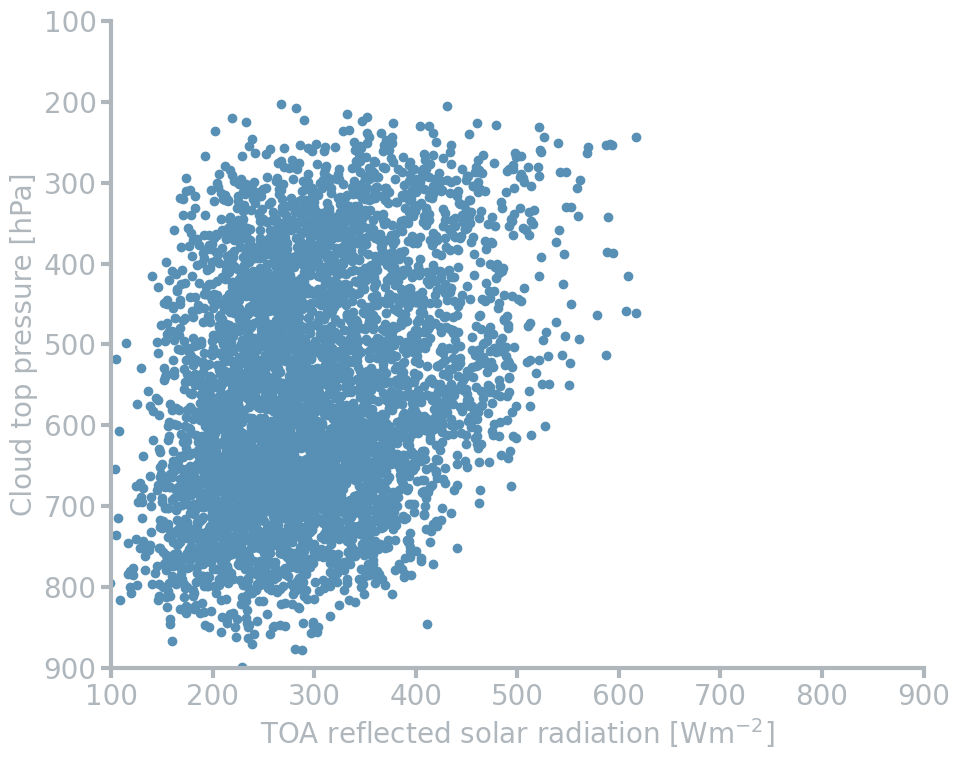

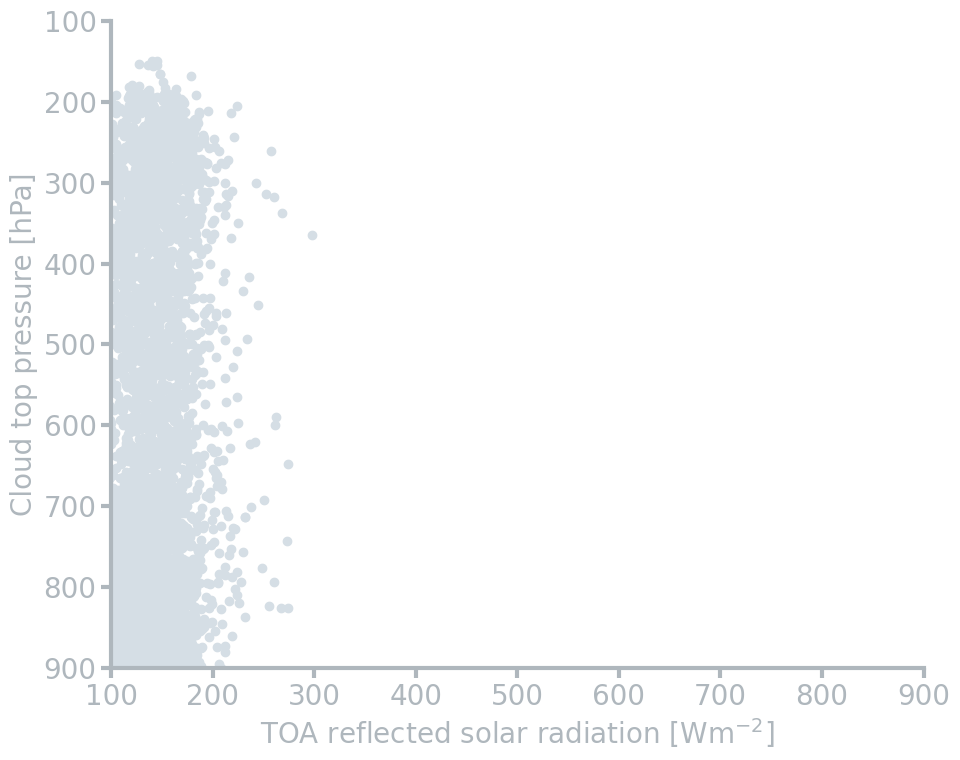

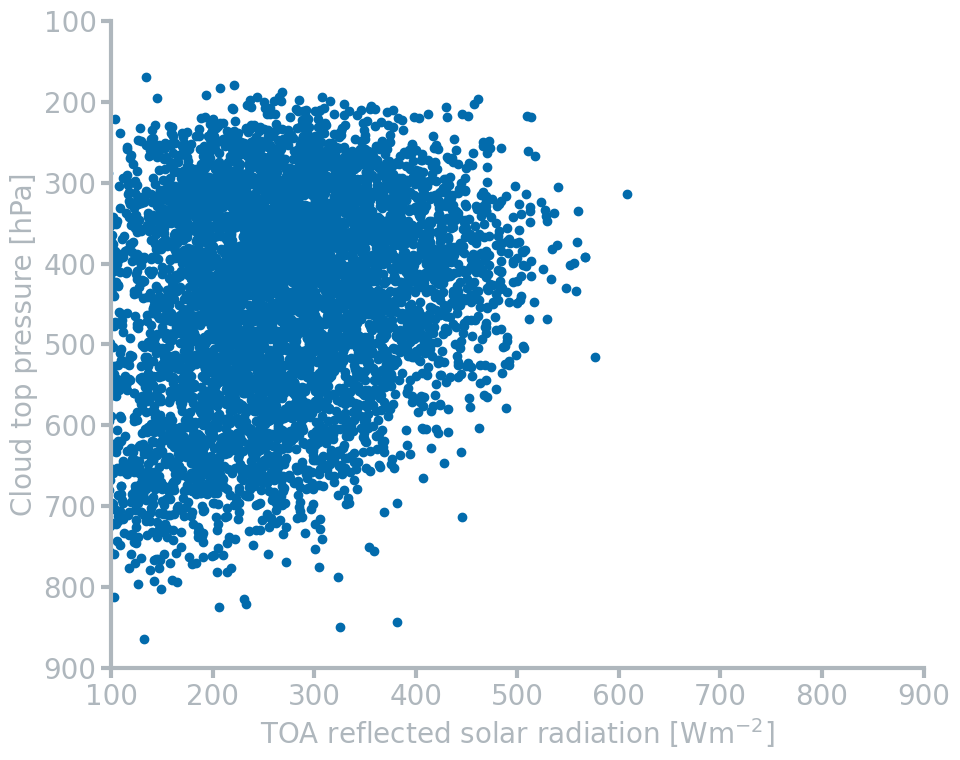

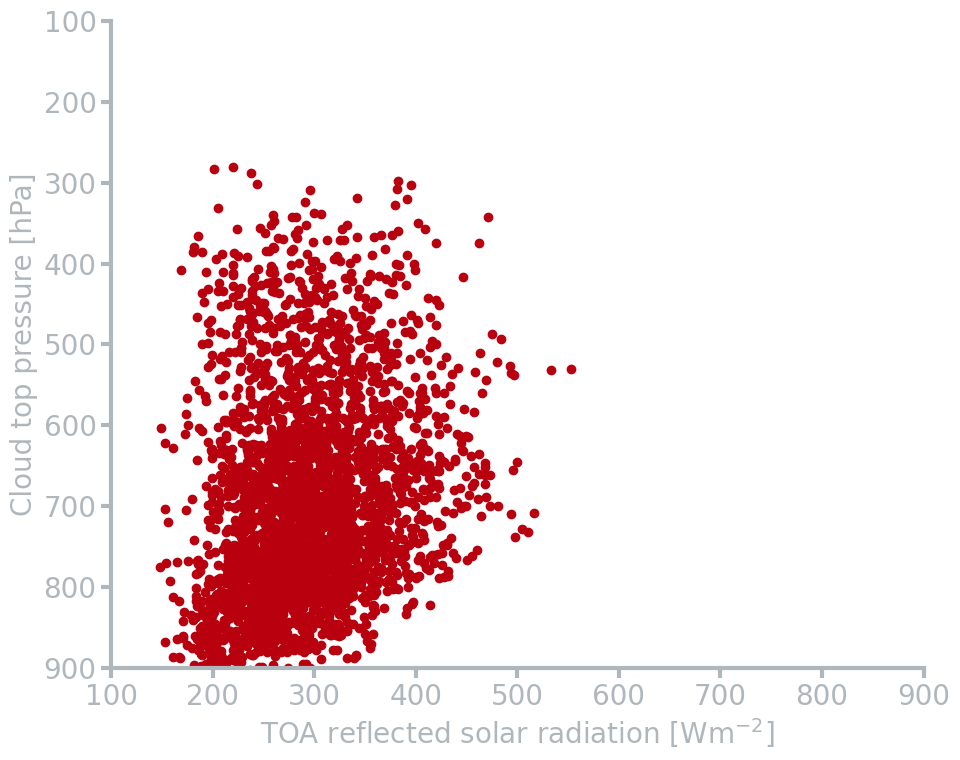

In [21]:

# define list of classes to plot
class_list = [class_1, 
              class_2, 
              class_3, 
              class_4, 
              class_5, 
              class_6, 
              class_7, 
              class_8, 
              class_9, 
              class_10, 
              class_11, 
              class_12]

color_list = [Dict_classes['color_1'], 
              Dict_classes['color_2'], 
              Dict_classes['color_3'], 
              Dict_classes['color_4'], 
              Dict_classes['color_5'], 
              Dict_classes['color_6'], 
              Dict_classes['color_7'], 
              Dict_classes['color_8'], 
              Dict_classes['color_9'], 
              Dict_classes['color_10'], 
              Dict_classes['color_11'], 
              Dict_classes['color_12']]

def plot_scatter_2(class_dataset, color_class):
    
    # Reading d ata from the dataset 
    y = class_dataset.ctp_mean.values
    x = class_dataset.trs_mean.values
    
    # selecting non nan values
    i_good = np.where(~np.isnan(x) * ~np.isnan(y))[0]

    # Creating a scatter plot with different colors
    plt.scatter(x[i_good], y[i_good], c=color_class, vmin=0, vmax=12)

    return()

for ind_class, class_sel in enumerate(class_list):
    
    print(ind_class)
    
    # starting the figure
    fig, axs = plt.subplots(figsize=(10,8))
    plt.gcf().subplots_adjust(bottom=0.1)
    path_out = path_to_csv
    dict_plot_settings = {
            'labelsizeaxes':20,
            'fontSizeTitle':20,
            'fontSizeX'    :20,
            'fontSizeY'    :20,
            'cbarAspect'   :20,
            'fontSizeCbar' :20,
            'rcparams_font':['Tahoma'],
            'savefig_dpi'  :100,
            'font_size'    :20, 
            'grid'         :True}
    labelsizeaxes   = dict_plot_settings['labelsizeaxes']
    fontSizeTitle   = dict_plot_settings['fontSizeTitle']
    fontSizeX       = dict_plot_settings['fontSizeX']
    fontSizeY       = dict_plot_settings['fontSizeY']
    cbarAspect      = dict_plot_settings['cbarAspect']
    fontSizeCbar    = dict_plot_settings['fontSizeCbar']
    plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
    grid = dict_plot_settings['grid']
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
    axs.spines["bottom"].set_linewidth(3)
    axs.spines["left"].set_linewidth(3)
    axs.tick_params(which='minor', length=5, width=2)
    axs.tick_params(which='major', length=7, width=3)
    if grey_axes_flag == 1:
        axs.spines['bottom'].set_color('#AFB7BD')
        axs.xaxis.label.set_color('#AFB7BD')
        axs.tick_params(axis='x', colors='#AFB7BD')
        axs.spines['left'].set_color('#AFB7BD')
        axs.yaxis.label.set_color('#AFB7BD')
        axs.tick_params(axis='y', colors='#AFB7BD')
        
    # reading information of the class
    class_color = color_list[ind_class]
    print(class_color)
    plot_scatter_2(class_sel, class_color)
    class_sel_name = 'class_'+str(ind_class+1)
    #plot_scatter(class_2, Dict_classes['color_2'])
    #plot_scatter(class_4, Dict_classes['color_4'])
    #plot_scatter(class_5, Dict_classes['color_5'])
    #plot_scatter(class_11, Dict_classes['color_11'])
    #plot_scatter(class_12, Dict_classes['color_12'])
    #plot_scatter(class_9, Dict_classes['color_9'])

    # Add labels and a title
    plt.ylabel('Cloud top pressure [hPa]')
    plt.xlabel('TOA reflected solar radiation [Wm$^{-2}$]')
    plt.xlim(100., 900.)
    plt.ylim(900., 100.)

    # Show the plot and save it to png
    plt.tight_layout()
    if grey_axes_flag == 1:
        figure_name = path_out+'/grey_axes/'+class_sel_name+'_ctp_trs_scatter_plot.png'
    else:
        figure_name = path_out+class_sel_name+'_ctp_trs_scatter_plot.png'
        
    plt.savefig(figure_name, bbox_inches='tight', transparent=True)
    
    
    ind_class = ind_class + 1
    

0
#059DFC
1
#000000
2
#B0D9F6
3
#D53A47
4
#F37C86
5
#93C9EF
6
#707579
7
#A1A7AC
8
#5790B4
9
#D5DEE5
10
#026BAC
11
#B8000F


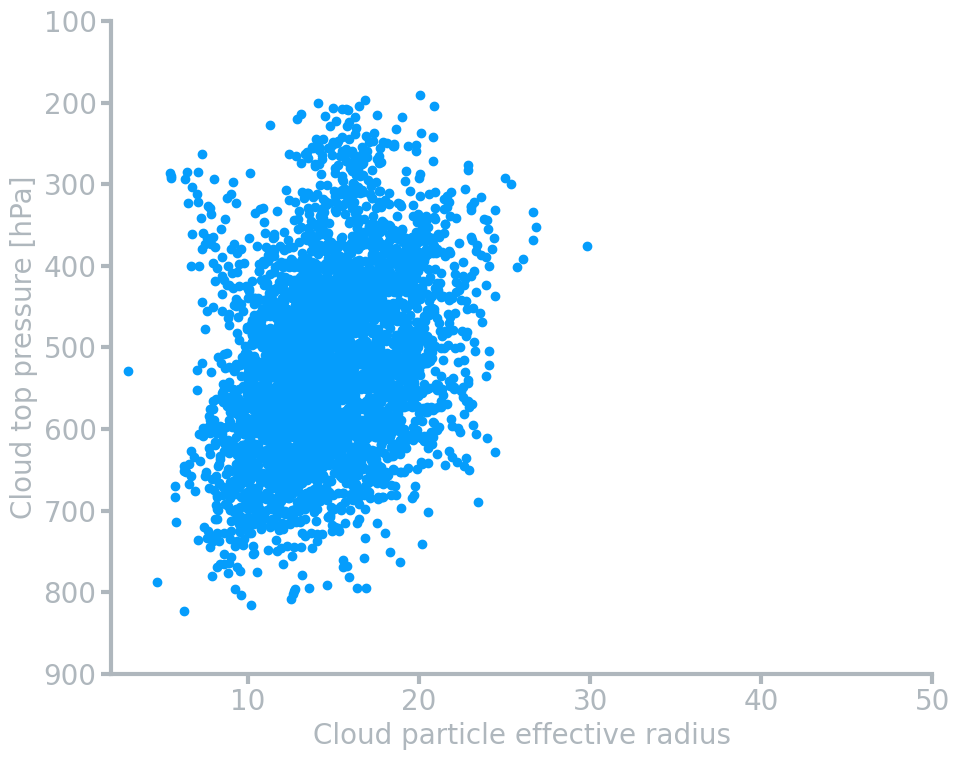

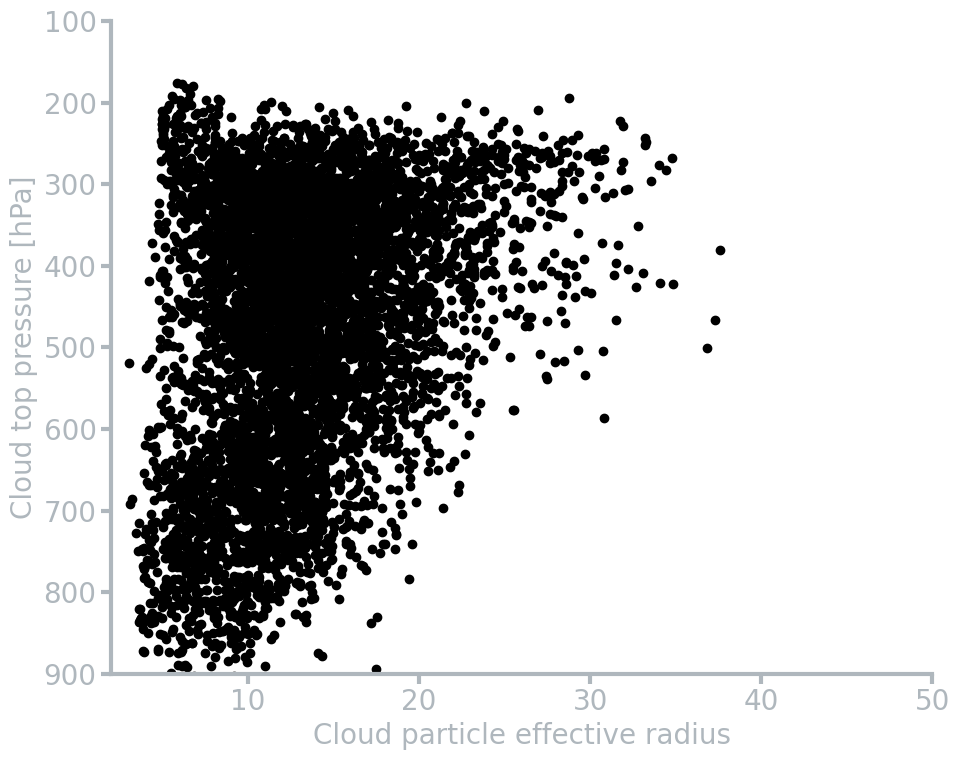

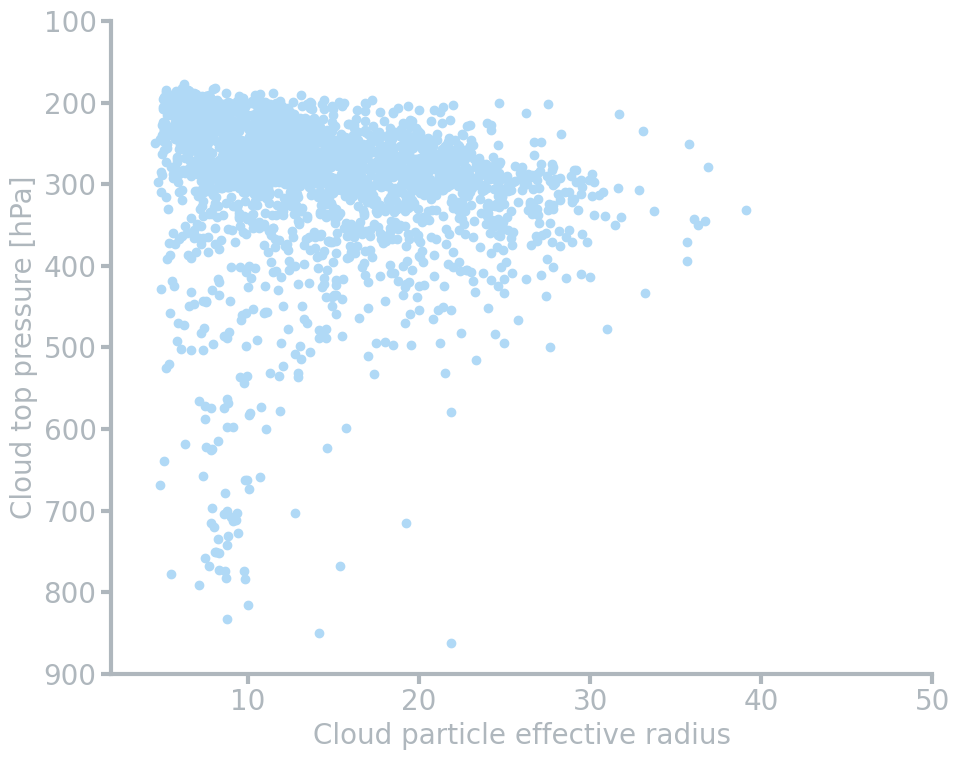

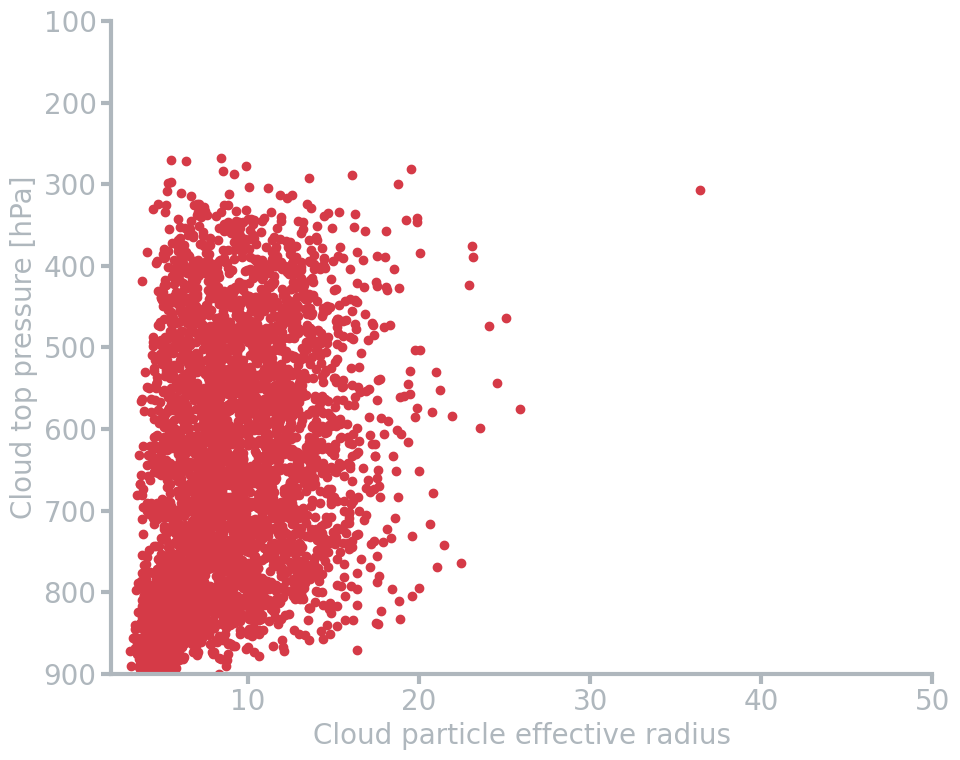

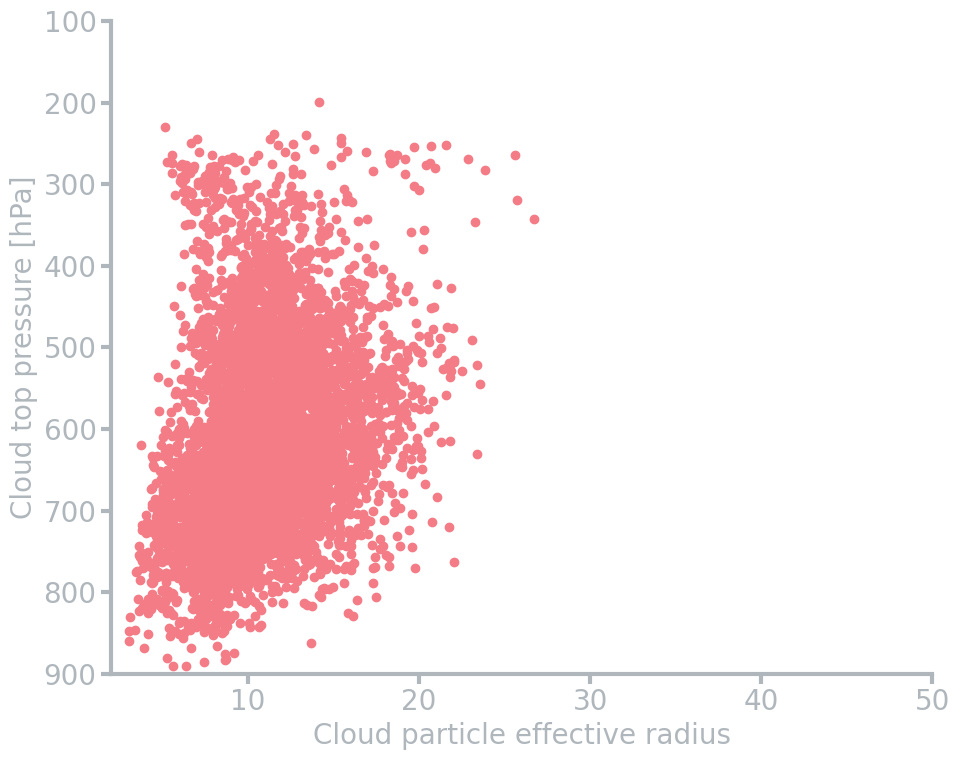

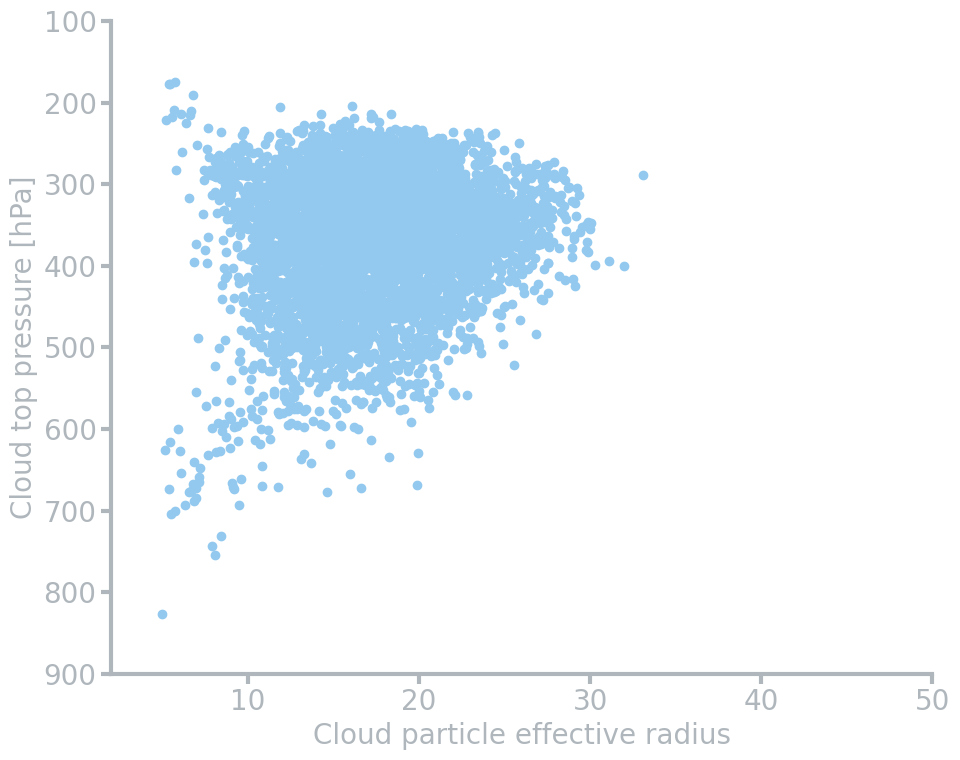

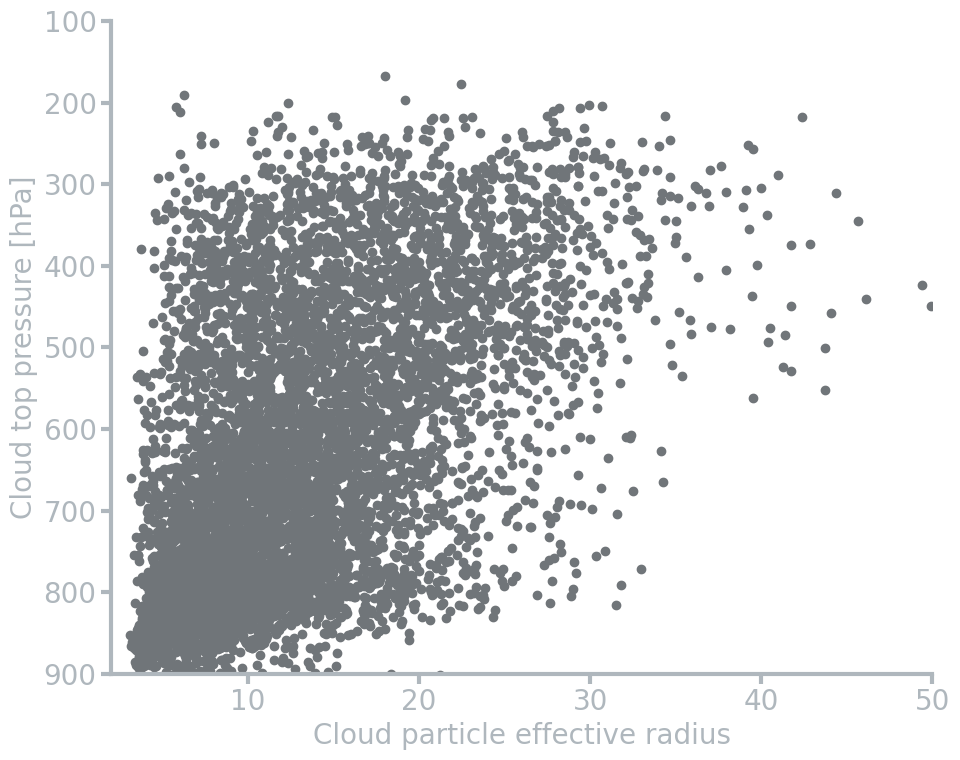

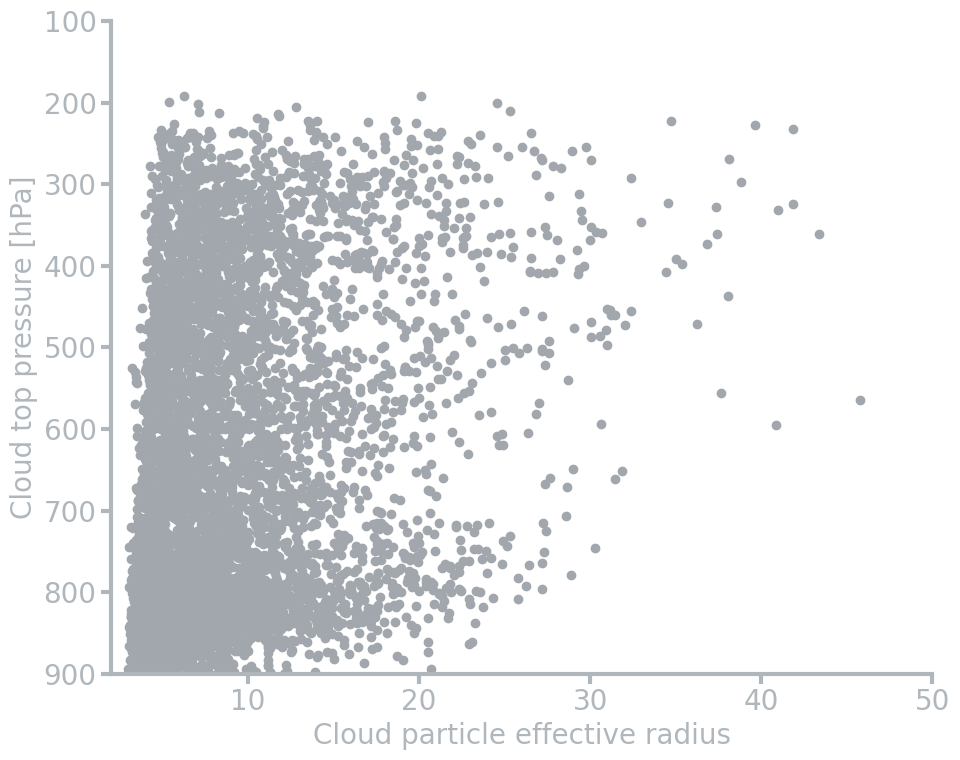

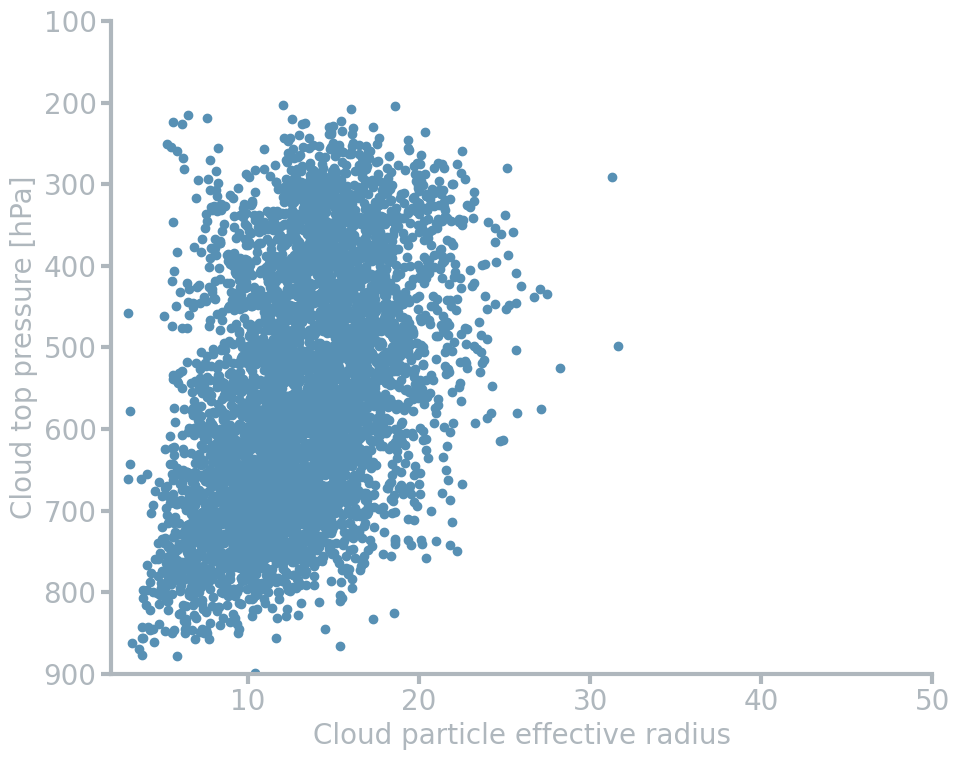

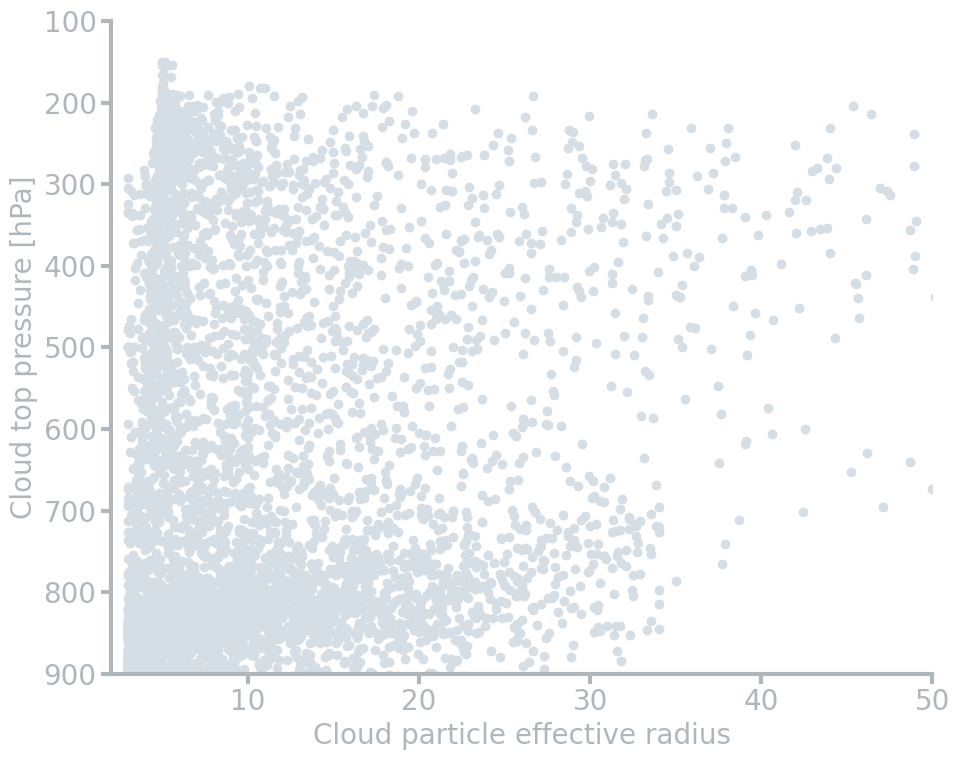

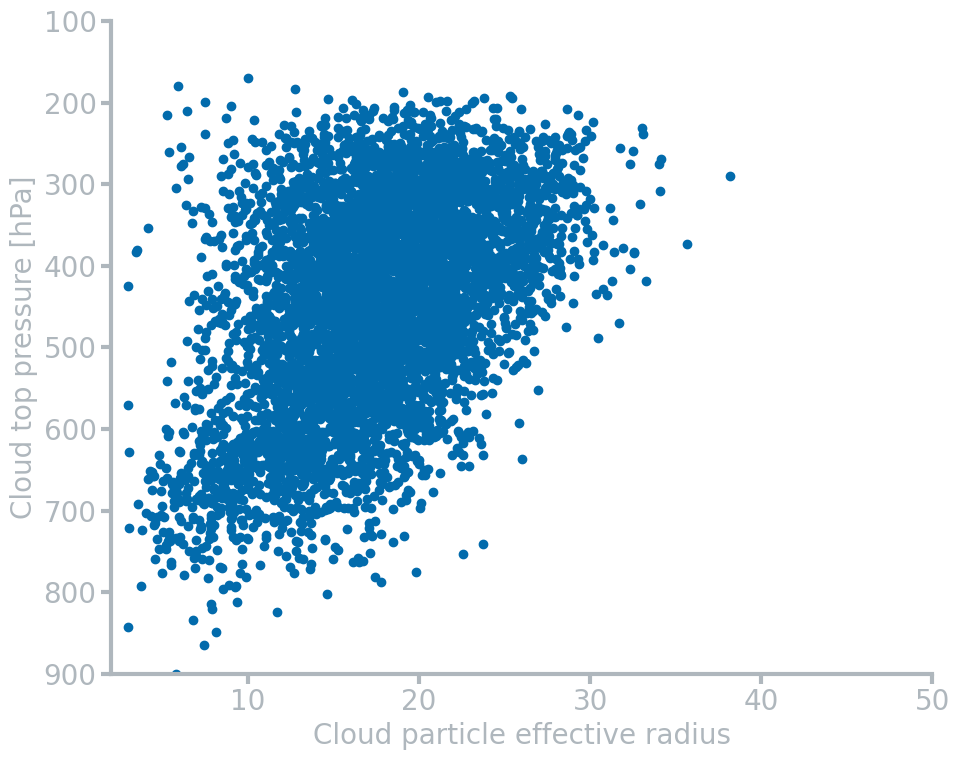

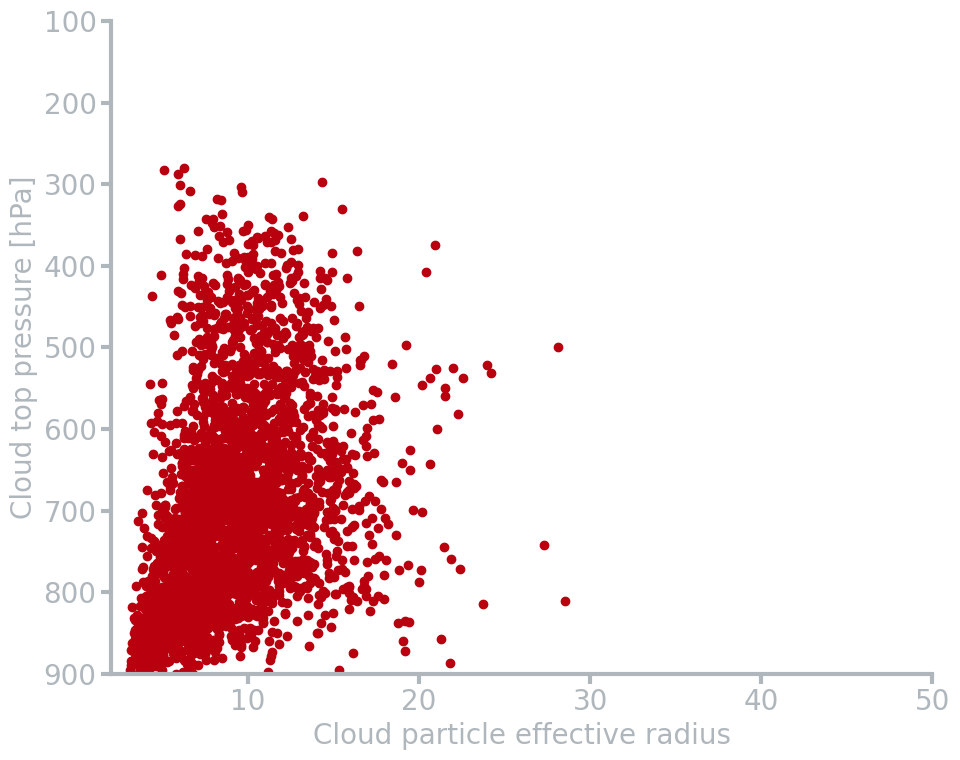

In [16]:
# define list of classes to plot
class_list = [class_1, 
              class_2, 
              class_3, 
              class_4, 
              class_5, 
              class_6, 
              class_7, 
              class_8, 
              class_9, 
              class_10, 
              class_11, 
              class_12]

color_list = [Dict_classes['color_1'], 
              Dict_classes['color_2'], 
              Dict_classes['color_3'], 
              Dict_classes['color_4'], 
              Dict_classes['color_5'], 
              Dict_classes['color_6'], 
              Dict_classes['color_7'], 
              Dict_classes['color_8'], 
              Dict_classes['color_9'], 
              Dict_classes['color_10'], 
              Dict_classes['color_11'], 
              Dict_classes['color_12']]

def plot_scatter_3(class_dataset, color_class):
    
    # Reading d ata from the dataset 
    y = class_dataset.ctp_mean.values
    x = class_dataset.cre_mean.values
    
    # selecting non nan values
    i_good = np.where(~np.isnan(x) * ~np.isnan(y))[0]

    # Creating a scatter plot with different colors
    plt.scatter(x[i_good], y[i_good], c=color_class, vmin=0, vmax=12)

    return()

for ind_class, class_sel in enumerate(class_list):
    
    print(ind_class)
    
    # starting the figure
    fig, axs = plt.subplots(figsize=(10,8))
    plt.gcf().subplots_adjust(bottom=0.1)
    path_out = path_to_csv
    dict_plot_settings = {
            'labelsizeaxes':20,
            'fontSizeTitle':20,
            'fontSizeX'    :20,
            'fontSizeY'    :20,
            'cbarAspect'   :20,
            'fontSizeCbar' :20,
            'rcparams_font':['Tahoma'],
            'savefig_dpi'  :100,
            'font_size'    :20, 
            'grid'         :True}
    labelsizeaxes   = dict_plot_settings['labelsizeaxes']
    fontSizeTitle   = dict_plot_settings['fontSizeTitle']
    fontSizeX       = dict_plot_settings['fontSizeX']
    fontSizeY       = dict_plot_settings['fontSizeY']
    cbarAspect      = dict_plot_settings['cbarAspect']
    fontSizeCbar    = dict_plot_settings['fontSizeCbar']
    plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
    grid = dict_plot_settings['grid']
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
    axs.spines["bottom"].set_linewidth(3)
    axs.spines["left"].set_linewidth(3)
    axs.tick_params(which='minor', length=5, width=2)
    axs.tick_params(which='major', length=7, width=3)

    if grey_axes_flag == 1:
        axs.spines['bottom'].set_color('#AFB7BD')
        axs.xaxis.label.set_color('#AFB7BD')
        axs.tick_params(axis='x', colors='#AFB7BD')
        axs.spines['left'].set_color('#AFB7BD')
        axs.yaxis.label.set_color('#AFB7BD')
        axs.tick_params(axis='y', colors='#AFB7BD')
        
    # reading information of the class
    class_color = color_list[ind_class]
    print(class_color)
    plot_scatter_3(class_sel, class_color)
    class_sel_name = 'class_'+str(ind_class+1)
    #plot_scatter(class_2, Dict_classes['color_2'])
    #plot_scatter(class_4, Dict_classes['color_4'])
    #plot_scatter(class_5, Dict_classes['color_5'])
    #plot_scatter(class_11, Dict_classes['color_11'])
    #plot_scatter(class_12, Dict_classes['color_12'])
    #plot_scatter(class_9, Dict_classes['color_9'])

    # Add labels and a title
    plt.ylabel('Cloud top pressure [hPa]')
    plt.xlabel('Cloud particle effective radius')
    plt.xlim(2., 50.)
    plt.ylim(900., 100.)

    # Show the plot and save it to png
    plt.tight_layout()
    if grey_axes_flag == 1:
        figure_name = path_out+'/grey_axes/'+class_sel_name+'_ctp_cre_scatter_plot.png'
    else:
        figure_name = path_out+class_sel_name+'_ctp_cre_scatter_plot.png'
        
    plt.savefig(figure_name, bbox_inches='tight', transparent=True)
    
    
    ind_class = ind_class + 1
    

### Plot of histograms of mean values and standard deviations for Cloud top height, cloud top temperature, cloud top pressure, cloud optical thickness, cloud effective radius

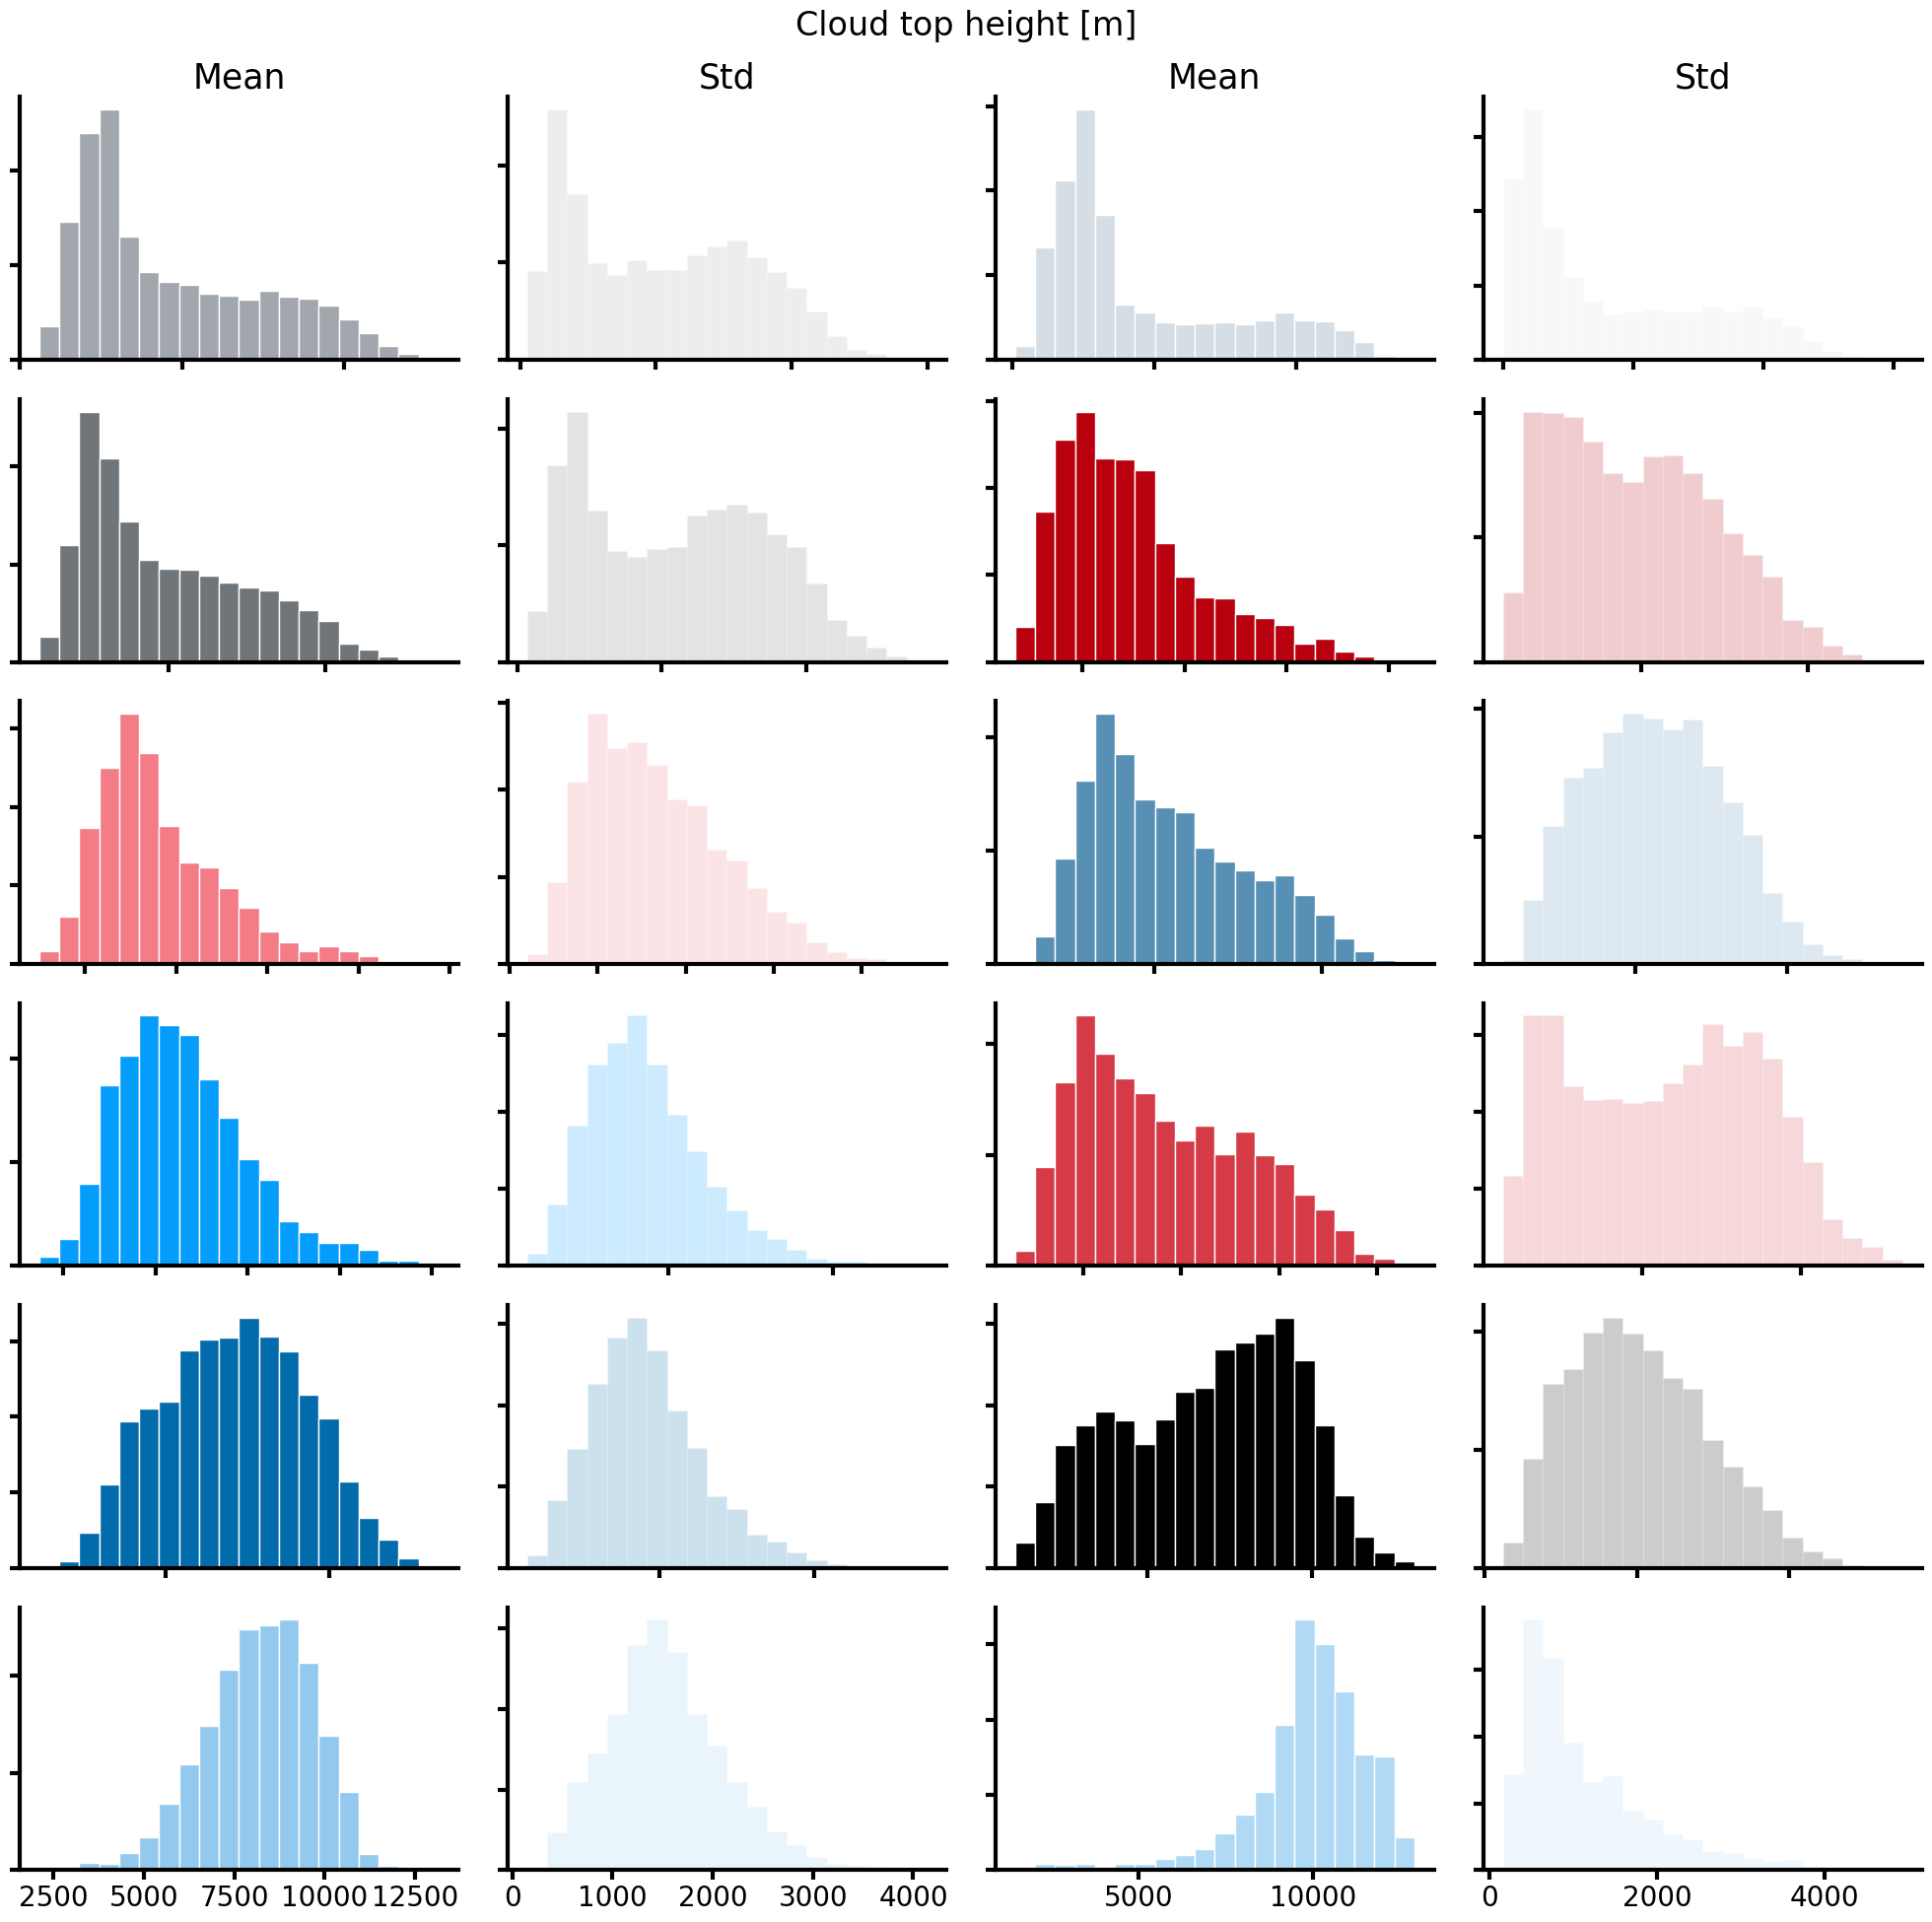

In [12]:
from matplotlib.ticker import PercentFormatter

# plot distributions for the different classes for specific variables
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
plt.gcf().subplots_adjust(bottom=0.1)
path_out = path_to_csv
dict_plot_settings = {
        'labelsizeaxes':20,
        'fontSizeTitle':20,
        'fontSizeX'    :20,
        'fontSizeY'    :20,
        'cbarAspect'   :20,
        'fontSizeCbar' :20,
        'rcparams_font':['Tahoma'],
        'savefig_dpi'  :100,
        'font_size'    :20, 
        'grid'         :True}
labelsizeaxes   = dict_plot_settings['labelsizeaxes']
fontSizeTitle   = dict_plot_settings['fontSizeTitle']
fontSizeX       = dict_plot_settings['fontSizeX']
fontSizeY       = dict_plot_settings['fontSizeY']
cbarAspect      = dict_plot_settings['cbarAspect']
fontSizeCbar    = dict_plot_settings['fontSizeCbar']
plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
grid = dict_plot_settings['grid']
#matplotlib.rc('xtick', labelsize=dict_plot_settings['font_size'])  # sets dimension of ticks in the plots
#matplotlib.rc('ytick', labelsize=dict_plot_settings['font_size']) # sets dimension of ticks in the plots
plt.yticks(color='w')
fig.suptitle('Cloud top height [m]')
def f_plot_rows(class_left, class_right, ind_row, color_left, color_right):
    
    '''function to plot histogram rows for the selected variable
    input:
    class_left: class dataset to plot on the first 2 columns
    class_right: class dataset to plot on the second 2 columns
    ind_row: index of the rows 
    var_name: name of the variable to be plotted
    color_left: hex code for color of the class on the left of the row
    color_right: hex code for color of the class on the right of the row
    '''
    if ind_row == 0:
        axs[ind_row,0].set_title( 'Mean', size = 25)
        axs[ind_row,1].set_title( 'Std', size = 25)
        axs[ind_row,2].set_title( 'Mean', size = 25)
        axs[ind_row,3].set_title( 'Std', size = 25)


    
    #selecting values from 
    mean = class_left.cth_mean.values[~np.isnan(class_left.cth_mean.values)]
    std = class_left.cth_std.values[~np.isnan(class_left.cth_std.values)]
    
    # first row of plots
    axs[ind_row,0].hist(mean, bins = 20,
                 color = color_left, edgecolor = 'white', density=True)
    axs[ind_row,0].axes.yaxis.set_ticklabels([])
    
    #axs[ind_row,0].yaxis.set_major_formatter(PercentFormatter(xmax=0.5))
    
    axs[ind_row,1].hist(std, bins = 20,
                 color = color_left, edgecolor = 'white', density=True, alpha=0.2)
    axs[ind_row,1].axes.yaxis.set_ticklabels([])

    mean = class_right.cth_mean.values[~np.isnan(class_right.cth_mean.values)]
    std = class_right.cth_std.values[~np.isnan(class_right.cth_std.values)]
    
    axs[ind_row,2].hist(mean, bins = 20,
                 color = color_right, edgecolor = 'white', density=True)
    axs[ind_row,2].axes.yaxis.set_ticklabels([])

    axs[ind_row,3].hist(std, bins = 20,
                 color = color_right, edgecolor = 'white', density=True, alpha=0.2)
    axs[ind_row,3].axes.yaxis.set_ticklabels([])
    if ind_row != 5:
        axs[ind_row,3].axes.xaxis.set_ticklabels([])
        axs[ind_row,2].axes.xaxis.set_ticklabels([])
        axs[ind_row,1].axes.xaxis.set_ticklabels([])
        axs[ind_row,0].axes.xaxis.set_ticklabels([])

    for ind_r in range(0,6):
        for ind_c in range(0,4):
            axs[ind_r,ind_c].spines["top"].set_visible(False)
            axs[ind_r,ind_c].spines["right"].set_visible(False)
            axs[ind_r,ind_c].spines["bottom"].set_linewidth(3)
            axs[ind_r,ind_c].spines["left"].set_linewidth(3)
            axs[ind_r,ind_c].tick_params(which='minor', length=5, width=2)
            axs[ind_r,ind_c].tick_params(which='major', length=7, width=3)
        

    return()
f_plot_rows(class_8, class_10, 0, Dict_classes['color_8'], Dict_classes['color_10'])
f_plot_rows(class_7, class_12, 1, Dict_classes['color_7'], Dict_classes['color_12'])
f_plot_rows(class_5, class_9, 2, Dict_classes['color_5'], Dict_classes['color_9'])
f_plot_rows(class_1, class_4, 3, Dict_classes['color_1'], Dict_classes['color_4'])
f_plot_rows(class_11, class_2, 4, Dict_classes['color_11'], Dict_classes['color_2'])
f_plot_rows(class_6, class_3, 5, Dict_classes['color_6'], Dict_classes['color_3'])

fig.tight_layout()

figure_name = path_out+'CHT_classes_histograms.png'
plt.savefig(figure_name, bbox_inches='tight', transparent=True)

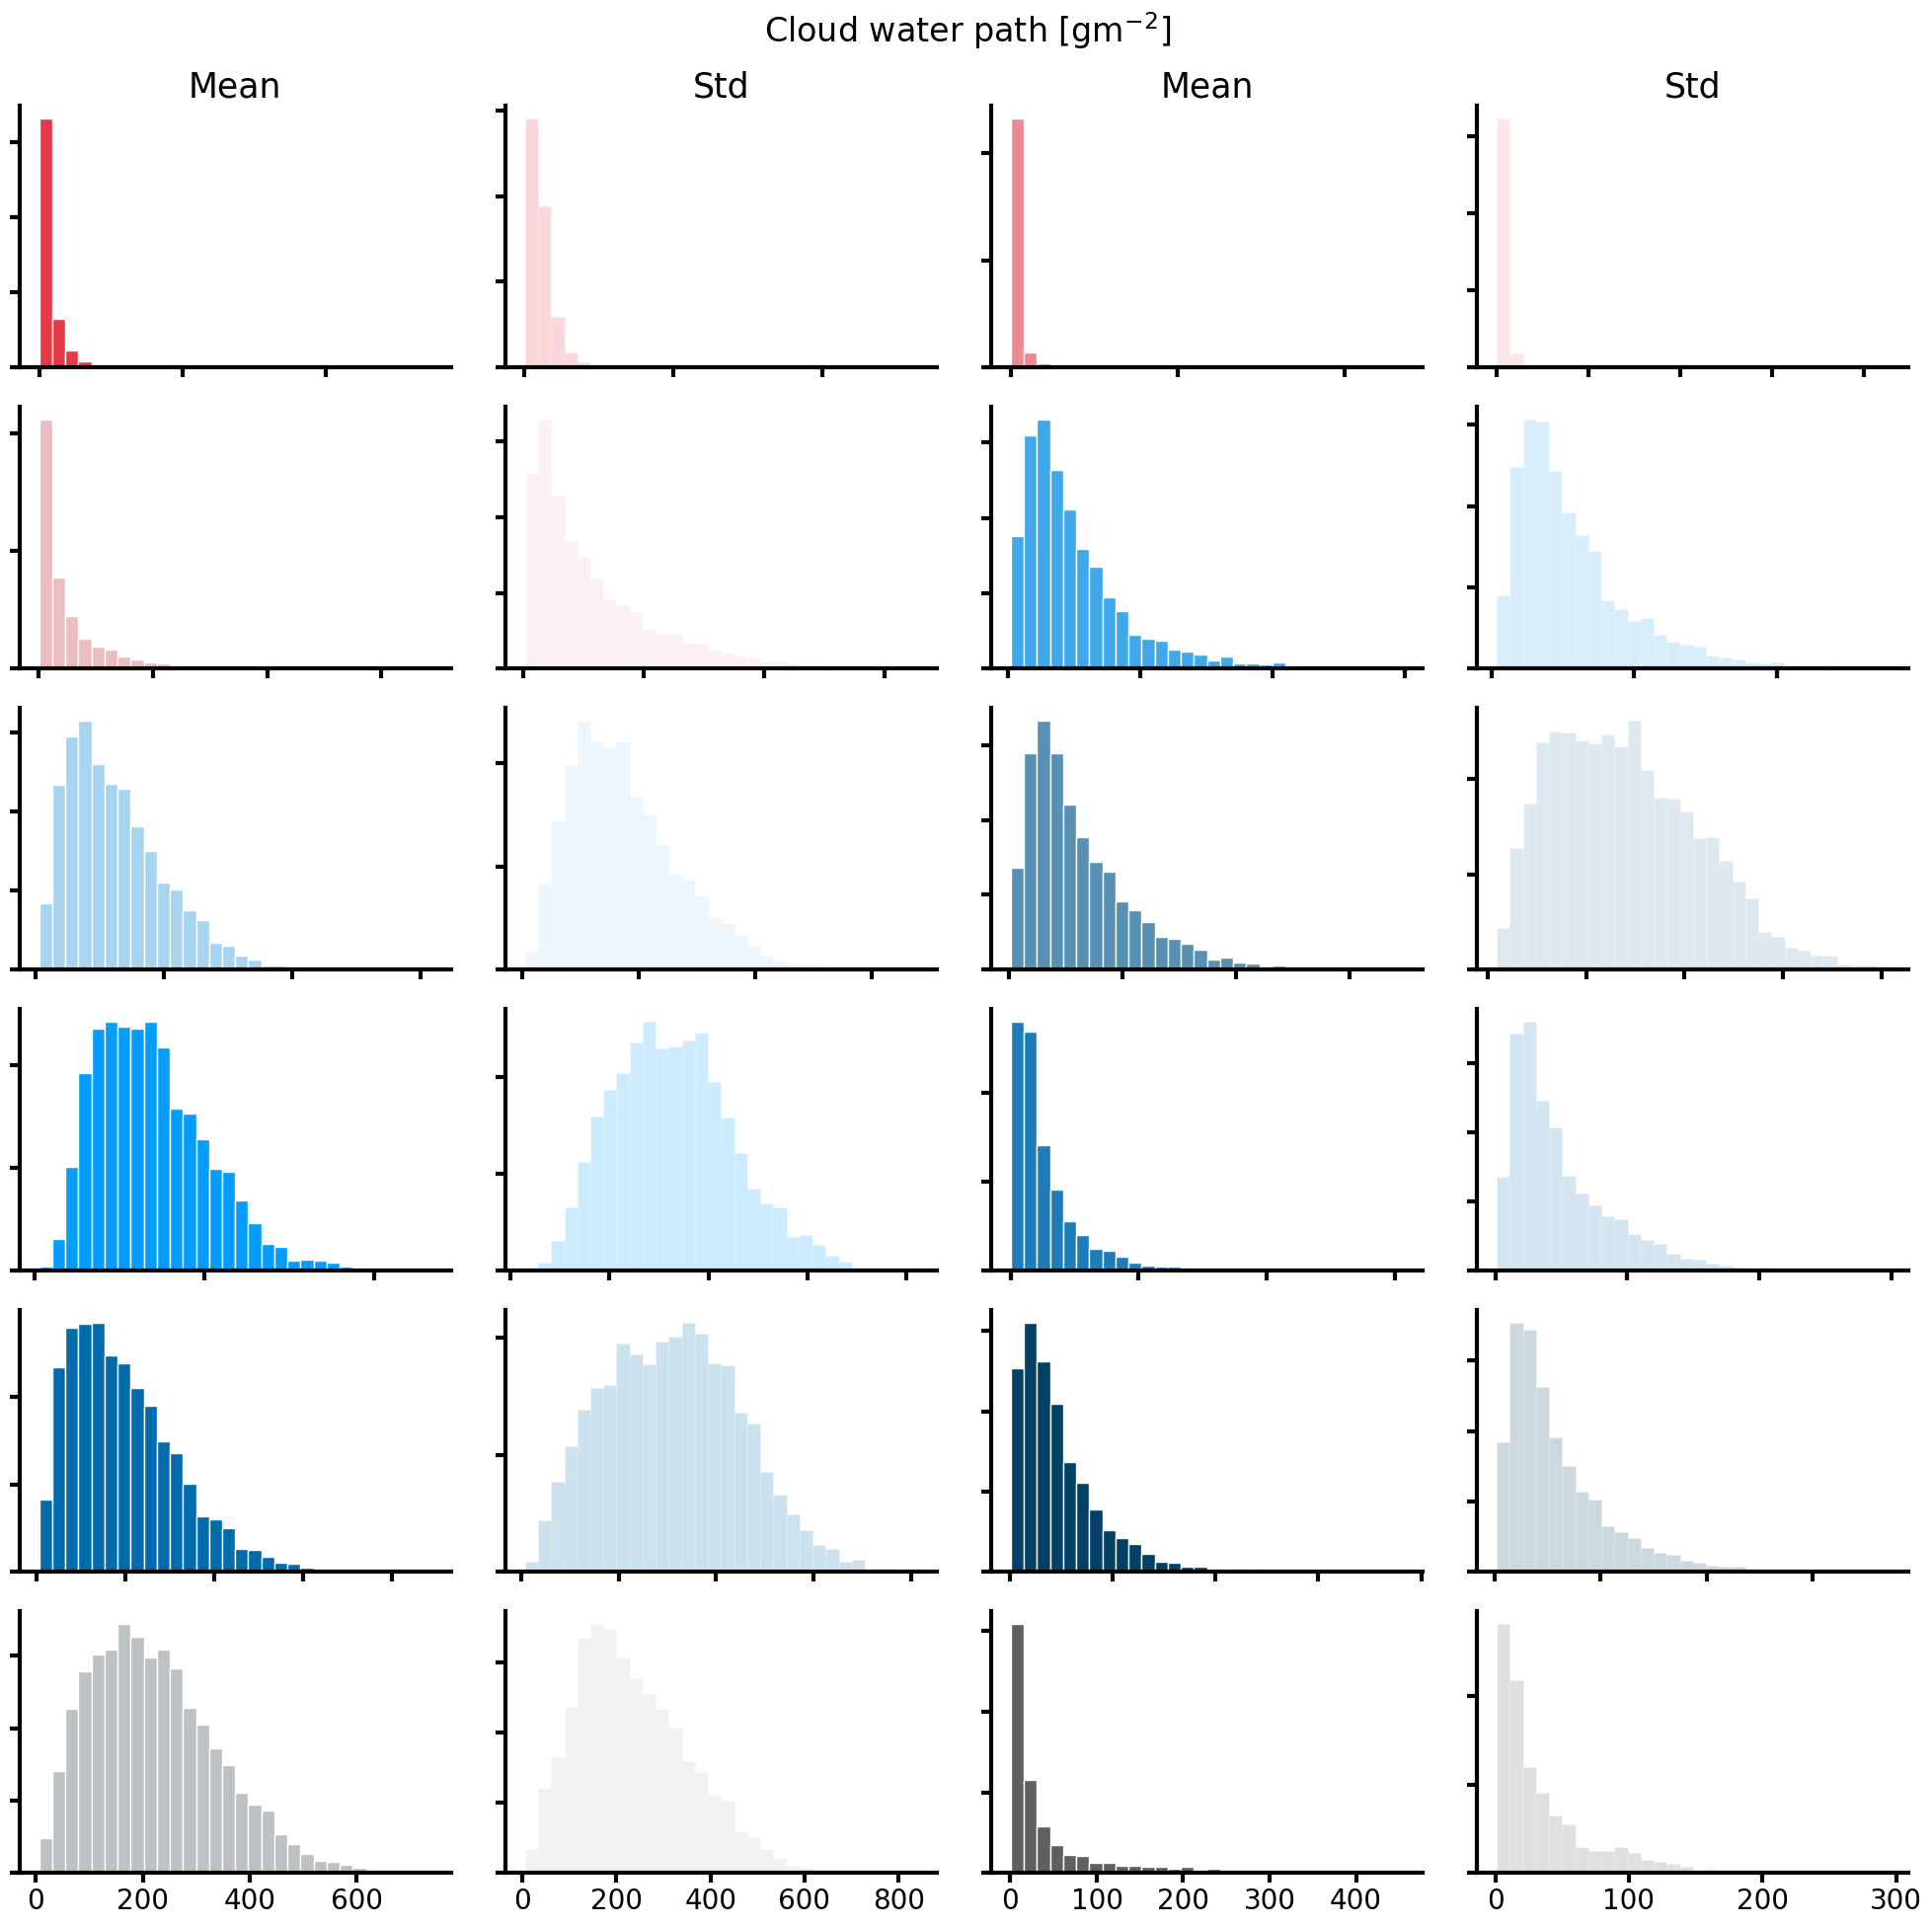

In [135]:
# plot distributions for the different classes for specific variables
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
plt.gcf().subplots_adjust(bottom=0.1)
path_out = path_to_csv
dict_plot_settings = {
        'labelsizeaxes':20,
        'fontSizeTitle':20,
        'fontSizeX'    :20,
        'fontSizeY'    :20,
        'cbarAspect'   :20,
        'fontSizeCbar' :20,
        'rcparams_font':['Tahoma'],
        'savefig_dpi'  :100,
        'font_size'    :20, 
        'grid'         :True}
labelsizeaxes   = dict_plot_settings['labelsizeaxes']
fontSizeTitle   = dict_plot_settings['fontSizeTitle']
fontSizeX       = dict_plot_settings['fontSizeX']
fontSizeY       = dict_plot_settings['fontSizeY']
cbarAspect      = dict_plot_settings['cbarAspect']
fontSizeCbar    = dict_plot_settings['fontSizeCbar']
plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
grid = dict_plot_settings['grid']
#matplotlib.rc('xtick', labelsize=dict_plot_settings['font_size'])  # sets dimension of ticks in the plots
#matplotlib.rc('ytick', labelsize=dict_plot_settings['font_size']) # sets dimension of ticks in the plots
plt.yticks(color='w')
fig.suptitle('Cloud water path [gm$^{-2}$]')
def f_plot_rows(class_left, class_right, var_name, ind_row, color_left, color_right, nbins):
    
    '''function to plot histogram rows for the selected variable
    input:
    class_left: class dataset to plot on the first 2 columns
    class_right: class dataset to plot on the second 2 columns
    ind_row: index of the rows 
    var_name: name of the variable to be plotted (string, like cth, see for more info)
    color_left: hex code for color of the class on the left of the row
    color_right: hex code for color of the class on the right of the row
    '''
    if ind_row == 0:
        axs[ind_row,0].set_title( 'Mean', size = 25)
        axs[ind_row,1].set_title( 'Std', size = 25)
        axs[ind_row,2].set_title( 'Mean', size = 25)
        axs[ind_row,3].set_title( 'Std', size = 25)


    
    #selecting values from 
    mean = class_left[var_name+'_mean'].values[~np.isnan(class_left[var_name+'_mean'].values)]
    std = class_left[var_name+'_std'].values[~np.isnan(class_left[var_name+'_std'].values)]
    
    # first row of plots
    axs[ind_row,0].hist(mean, bins = nbins,
                 color = color_left, edgecolor = 'white', density=True)
    axs[ind_row,0].axes.yaxis.set_ticklabels([])
    
    #axs[ind_row,0].yaxis.set_major_formatter(PercentFormatter(xmax=0.5))
    
    axs[ind_row,1].hist(std, bins = nbins,
                 color = color_left, edgecolor = 'white', density=True, alpha=0.2)
    axs[ind_row,1].axes.yaxis.set_ticklabels([])

    mean = class_right[var_name+'_mean'].values[~np.isnan(class_right[var_name+'_mean'].values)]
    std = class_right[var_name+'_std'].values[~np.isnan(class_right[var_name+'_std'].values)]
        
    axs[ind_row,2].hist(mean, bins = nbins,
                 color = color_right, edgecolor = 'white', density=True)
    axs[ind_row,2].axes.yaxis.set_ticklabels([])

    axs[ind_row,3].hist(std, bins = nbins,
                 color = color_right, edgecolor = 'white', density=True, alpha=0.2)
    axs[ind_row,3].axes.yaxis.set_ticklabels([])
    if ind_row != 5:
        axs[ind_row,3].axes.xaxis.set_ticklabels([])
        axs[ind_row,2].axes.xaxis.set_ticklabels([])
        axs[ind_row,1].axes.xaxis.set_ticklabels([])
        axs[ind_row,0].axes.xaxis.set_ticklabels([])

    for ind_r in range(0,6):
        for ind_c in range(0,4):
            axs[ind_r,ind_c].spines["top"].set_visible(False)
            axs[ind_r,ind_c].spines["right"].set_visible(False)
            axs[ind_r,ind_c].spines["bottom"].set_linewidth(3)
            axs[ind_r,ind_c].spines["left"].set_linewidth(3)
            axs[ind_r,ind_c].tick_params(which='minor', length=5, width=2)
            axs[ind_r,ind_c].tick_params(which='major', length=7, width=3)
        

    return()
f_plot_rows(class_8, class_10, 'cwp', 0, Dict_classes['color_8'], Dict_classes['color_10'], 30)
f_plot_rows(class_7, class_12, 'cwp', 1, Dict_classes['color_7'], Dict_classes['color_12'], 30)
f_plot_rows(class_5, class_9, 'cwp', 2, Dict_classes['color_5'], Dict_classes['color_9'], 30)
f_plot_rows(class_1, class_4, 'cwp', 3, Dict_classes['color_1'], Dict_classes['color_4'], 30)
f_plot_rows(class_11, class_2, 'cwp', 4, Dict_classes['color_11'], Dict_classes['color_2'], 30)
f_plot_rows(class_6, class_3, 'cwp', 5, Dict_classes['color_6'], Dict_classes['color_3'], 30)

fig.tight_layout()
figure_name = path_out+'cwp_classes_histograms.png'
plt.savefig(figure_name, bbox_inches='tight', transparent=True)

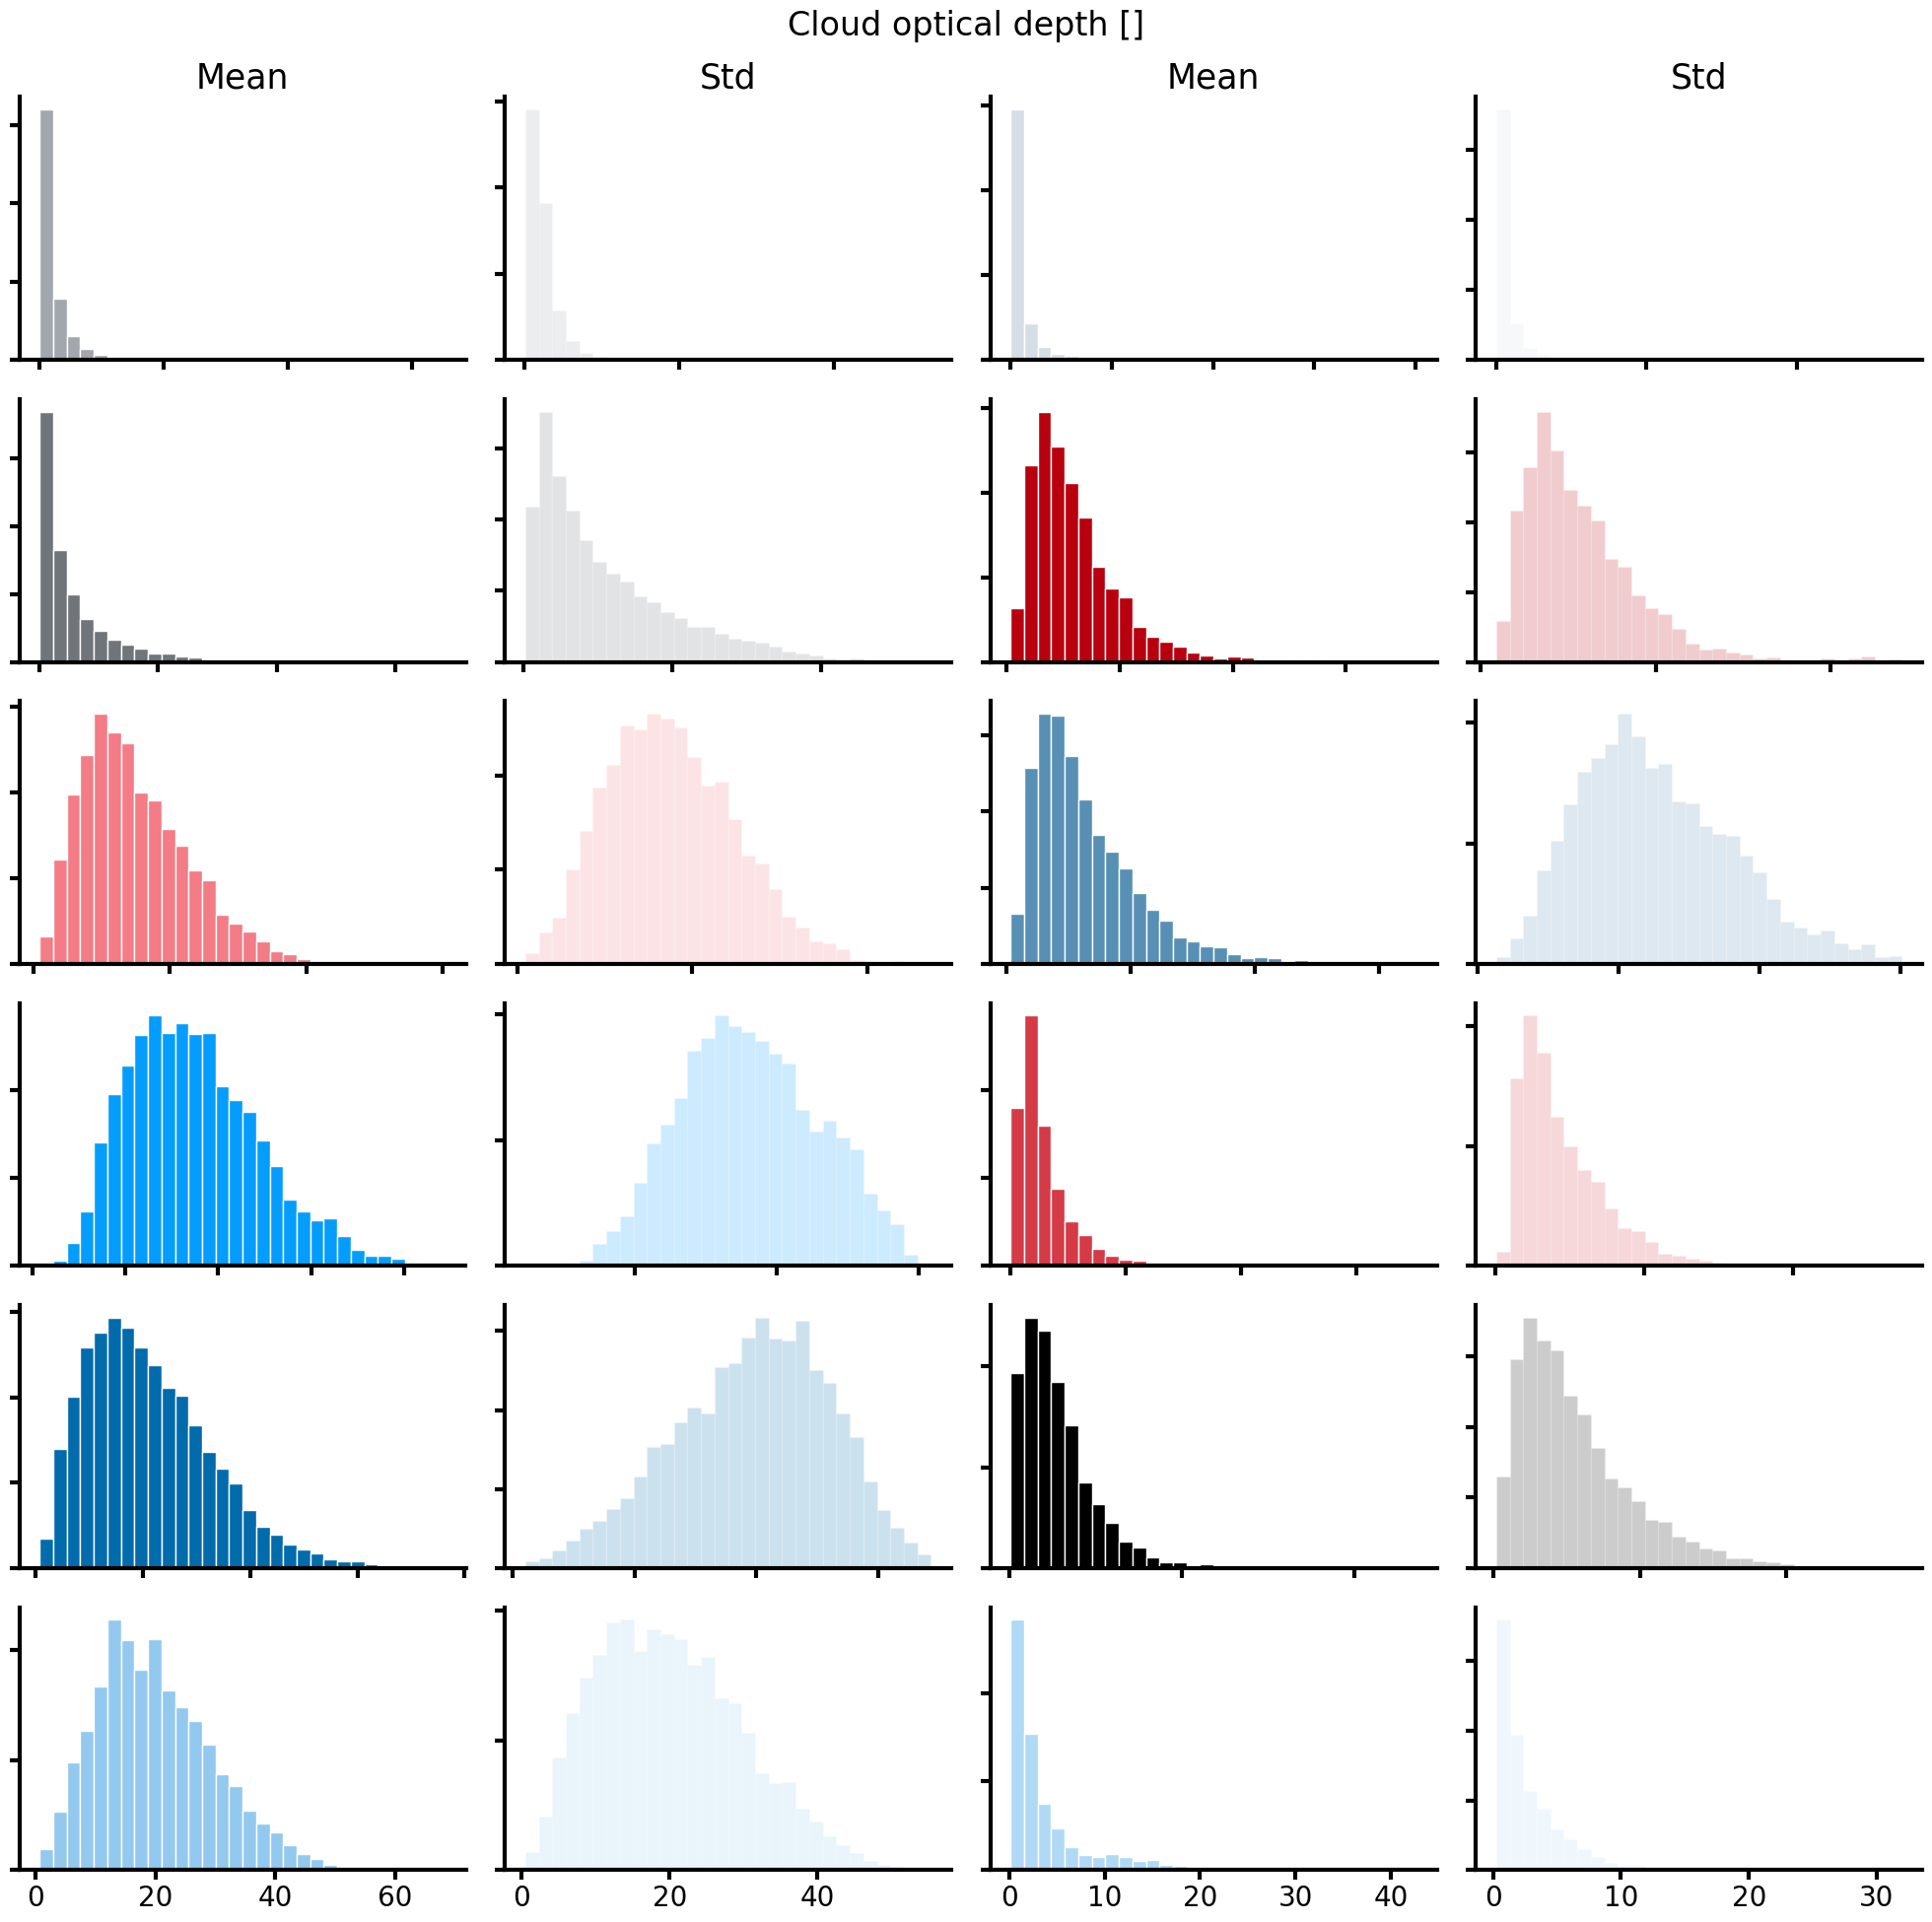

In [13]:
# plot distributions for the different classes for specific variables
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
plt.gcf().subplots_adjust(bottom=0.1)
path_out = path_to_csv
dict_plot_settings = {
        'labelsizeaxes':20,
        'fontSizeTitle':20,
        'fontSizeX'    :20,
        'fontSizeY'    :20,
        'cbarAspect'   :20,
        'fontSizeCbar' :20,
        'rcparams_font':['Tahoma'],
        'savefig_dpi'  :100,
        'font_size'    :20, 
        'grid'         :True}
labelsizeaxes   = dict_plot_settings['labelsizeaxes']
fontSizeTitle   = dict_plot_settings['fontSizeTitle']
fontSizeX       = dict_plot_settings['fontSizeX']
fontSizeY       = dict_plot_settings['fontSizeY']
cbarAspect      = dict_plot_settings['cbarAspect']
fontSizeCbar    = dict_plot_settings['fontSizeCbar']
plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
grid = dict_plot_settings['grid']
#matplotlib.rc('xtick', labelsize=dict_plot_settings['font_size'])  # sets dimension of ticks in the plots
#matplotlib.rc('ytick', labelsize=dict_plot_settings['font_size']) # sets dimension of ticks in the plots
plt.yticks(color='w')
fig.suptitle('Cloud optical depth []')
def f_plot_rows(class_left, class_right, var_name, ind_row, color_left, color_right, nbins):
    
    '''function to plot histogram rows for the selected variable
    input:
    class_left: class dataset to plot on the first 2 columns
    class_right: class dataset to plot on the second 2 columns
    ind_row: index of the rows 
    var_name: name of the variable to be plotted (string, like cth, see for more info)
    color_left: hex code for color of the class on the left of the row
    color_right: hex code for color of the class on the right of the row
    '''
    if ind_row == 0:
        axs[ind_row,0].set_title( 'Mean', size = 25)
        axs[ind_row,1].set_title( 'Std', size = 25)
        axs[ind_row,2].set_title( 'Mean', size = 25)
        axs[ind_row,3].set_title( 'Std', size = 25)


    
    #selecting values from 
    mean = class_left[var_name+'_mean'].values[~np.isnan(class_left[var_name+'_mean'].values)]
    std = class_left[var_name+'_std'].values[~np.isnan(class_left[var_name+'_std'].values)]
    
    # first row of plots
    axs[ind_row,0].hist(mean, bins = nbins,
                 color = color_left, edgecolor = 'white', density=True)
    axs[ind_row,0].axes.yaxis.set_ticklabels([])
    
    #axs[ind_row,0].yaxis.set_major_formatter(PercentFormatter(xmax=0.5))
    
    axs[ind_row,1].hist(std, bins = nbins,
                 color = color_left, edgecolor = 'white', density=True, alpha=0.2)
    axs[ind_row,1].axes.yaxis.set_ticklabels([])

    mean = class_right[var_name+'_mean'].values[~np.isnan(class_right[var_name+'_mean'].values)]
    std = class_right[var_name+'_std'].values[~np.isnan(class_right[var_name+'_std'].values)]
        
    axs[ind_row,2].hist(mean, bins = nbins,
                 color = color_right, edgecolor = 'white', density=True)
    axs[ind_row,2].axes.yaxis.set_ticklabels([])

    axs[ind_row,3].hist(std, bins = nbins,
                 color = color_right, edgecolor = 'white', density=True, alpha=0.2)
    axs[ind_row,3].axes.yaxis.set_ticklabels([])
    if ind_row != 5:
        axs[ind_row,3].axes.xaxis.set_ticklabels([])
        axs[ind_row,2].axes.xaxis.set_ticklabels([])
        axs[ind_row,1].axes.xaxis.set_ticklabels([])
        axs[ind_row,0].axes.xaxis.set_ticklabels([])

    for ind_r in range(0,6):
        for ind_c in range(0,4):
            axs[ind_r,ind_c].spines["top"].set_visible(False)
            axs[ind_r,ind_c].spines["right"].set_visible(False)
            axs[ind_r,ind_c].spines["bottom"].set_linewidth(3)
            axs[ind_r,ind_c].spines["left"].set_linewidth(3)
            axs[ind_r,ind_c].tick_params(which='minor', length=5, width=2)
            axs[ind_r,ind_c].tick_params(which='major', length=7, width=3)
        

    return()
f_plot_rows(class_8, class_10, 'cot', 0, Dict_classes['color_8'], Dict_classes['color_10'], 30)
f_plot_rows(class_7, class_12, 'cot', 1, Dict_classes['color_7'], Dict_classes['color_12'], 30)
f_plot_rows(class_5, class_9, 'cot', 2, Dict_classes['color_5'], Dict_classes['color_9'], 30)
f_plot_rows(class_1, class_4, 'cot', 3, Dict_classes['color_1'], Dict_classes['color_4'], 30)
f_plot_rows(class_11, class_2, 'cot', 4, Dict_classes['color_11'], Dict_classes['color_2'], 30)
f_plot_rows(class_6, class_3, 'cot', 5, Dict_classes['color_6'], Dict_classes['color_3'], 30)

fig.tight_layout()
figure_name = path_out+'cot_classes_histograms.png'
plt.savefig(figure_name, bbox_inches='tight', transparent=True)

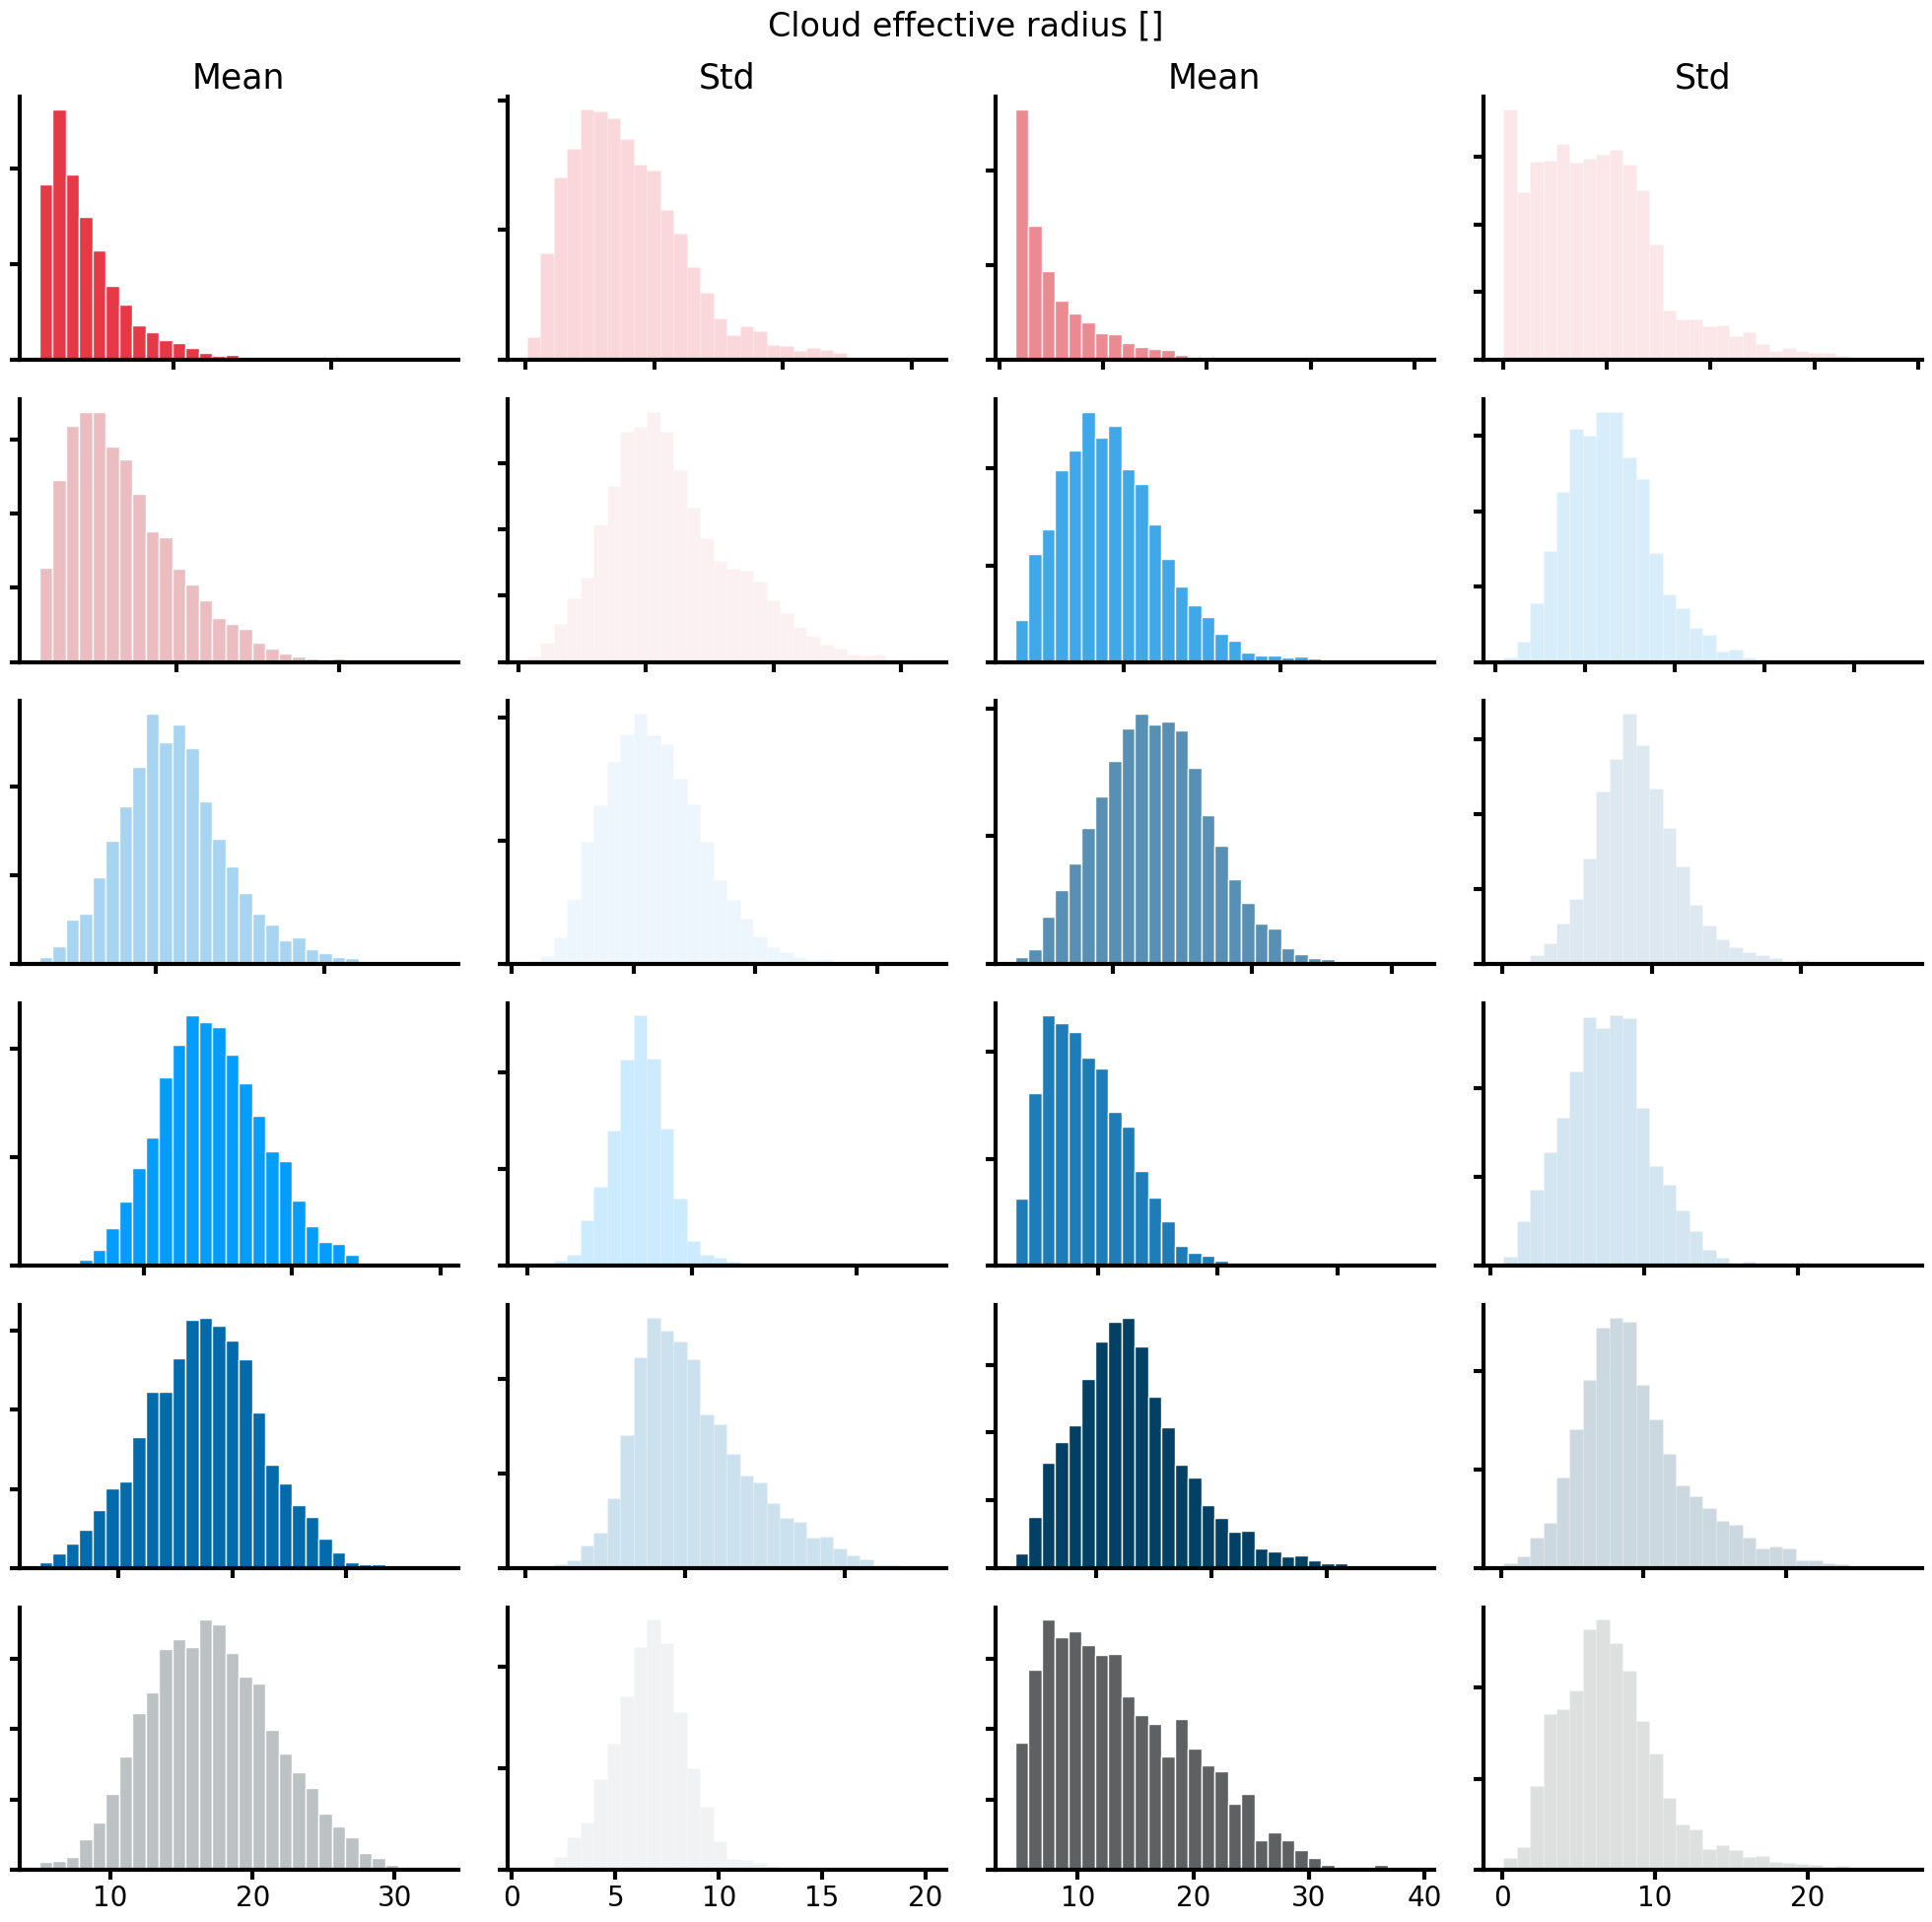

In [137]:
# plot distributions for the different classes for specific variables
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
plt.gcf().subplots_adjust(bottom=0.1)
path_out = path_to_csv
dict_plot_settings = {
        'labelsizeaxes':20,
        'fontSizeTitle':20,
        'fontSizeX'    :20,
        'fontSizeY'    :20,
        'cbarAspect'   :20,
        'fontSizeCbar' :20,
        'rcparams_font':['Tahoma'],
        'savefig_dpi'  :100,
        'font_size'    :20, 
        'grid'         :True}
labelsizeaxes   = dict_plot_settings['labelsizeaxes']
fontSizeTitle   = dict_plot_settings['fontSizeTitle']
fontSizeX       = dict_plot_settings['fontSizeX']
fontSizeY       = dict_plot_settings['fontSizeY']
cbarAspect      = dict_plot_settings['cbarAspect']
fontSizeCbar    = dict_plot_settings['fontSizeCbar']
plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
grid = dict_plot_settings['grid']
#matplotlib.rc('xtick', labelsize=dict_plot_settings['font_size'])  # sets dimension of ticks in the plots
#matplotlib.rc('ytick', labelsize=dict_plot_settings['font_size']) # sets dimension of ticks in the plots
plt.yticks(color='w')
fig.suptitle('Cloud effective radius []')
def f_plot_rows(class_left, class_right, var_name, ind_row, color_left, color_right, nbins):
    
    '''function to plot histogram rows for the selected variable
    input:
    class_left: class dataset to plot on the first 2 columns
    class_right: class dataset to plot on the second 2 columns
    ind_row: index of the rows 
    var_name: name of the variable to be plotted (string, like cth, see for more info)
    color_left: hex code for color of the class on the left of the row
    color_right: hex code for color of the class on the right of the row
    '''
    if ind_row == 0:
        axs[ind_row,0].set_title( 'Mean', size = 25)
        axs[ind_row,1].set_title( 'Std', size = 25)
        axs[ind_row,2].set_title( 'Mean', size = 25)
        axs[ind_row,3].set_title( 'Std', size = 25)


    
    #selecting values from 
    mean = class_left[var_name+'_mean'].values[~np.isnan(class_left[var_name+'_mean'].values)]
    std = class_left[var_name+'_std'].values[~np.isnan(class_left[var_name+'_std'].values)]
    
    # first row of plots
    axs[ind_row,0].hist(mean, bins = nbins,
                 color = color_left, edgecolor = 'white', density=True)
    axs[ind_row,0].axes.yaxis.set_ticklabels([])
    
    #axs[ind_row,0].yaxis.set_major_formatter(PercentFormatter(xmax=0.5))
    
    axs[ind_row,1].hist(std, bins = nbins,
                 color = color_left, edgecolor = 'white', density=True, alpha=0.2)
    axs[ind_row,1].axes.yaxis.set_ticklabels([])

    mean = class_right[var_name+'_mean'].values[~np.isnan(class_right[var_name+'_mean'].values)]
    std = class_right[var_name+'_std'].values[~np.isnan(class_right[var_name+'_std'].values)]
        
    axs[ind_row,2].hist(mean, bins = nbins,
                 color = color_right, edgecolor = 'white', density=True)
    axs[ind_row,2].axes.yaxis.set_ticklabels([])

    axs[ind_row,3].hist(std, bins = nbins,
                 color = color_right, edgecolor = 'white', density=True, alpha=0.2)
    axs[ind_row,3].axes.yaxis.set_ticklabels([])
    if ind_row != 5:
        axs[ind_row,3].axes.xaxis.set_ticklabels([])
        axs[ind_row,2].axes.xaxis.set_ticklabels([])
        axs[ind_row,1].axes.xaxis.set_ticklabels([])
        axs[ind_row,0].axes.xaxis.set_ticklabels([])

    for ind_r in range(0,6):
        for ind_c in range(0,4):
            axs[ind_r,ind_c].spines["top"].set_visible(False)
            axs[ind_r,ind_c].spines["right"].set_visible(False)
            axs[ind_r,ind_c].spines["bottom"].set_linewidth(3)
            axs[ind_r,ind_c].spines["left"].set_linewidth(3)
            axs[ind_r,ind_c].tick_params(which='minor', length=5, width=2)
            axs[ind_r,ind_c].tick_params(which='major', length=7, width=3)
        

    return()
f_plot_rows(class_8, class_10, 'cre', 0, Dict_classes['color_8'], Dict_classes['color_10'], 30)
f_plot_rows(class_7, class_12, 'cre', 1, Dict_classes['color_7'], Dict_classes['color_12'], 30)
f_plot_rows(class_5, class_9, 'cre', 2, Dict_classes['color_5'], Dict_classes['color_9'], 30)
f_plot_rows(class_1, class_4, 'cre', 3, Dict_classes['color_1'], Dict_classes['color_4'], 30)
f_plot_rows(class_11, class_2, 'cre', 4, Dict_classes['color_11'], Dict_classes['color_2'], 30)
f_plot_rows(class_6, class_3, 'cre', 5, Dict_classes['color_6'], Dict_classes['color_3'], 30)

fig.tight_layout()
figure_name = path_out+'cre_classes_histograms.png'
plt.savefig(figure_name, bbox_inches='tight', transparent=True)

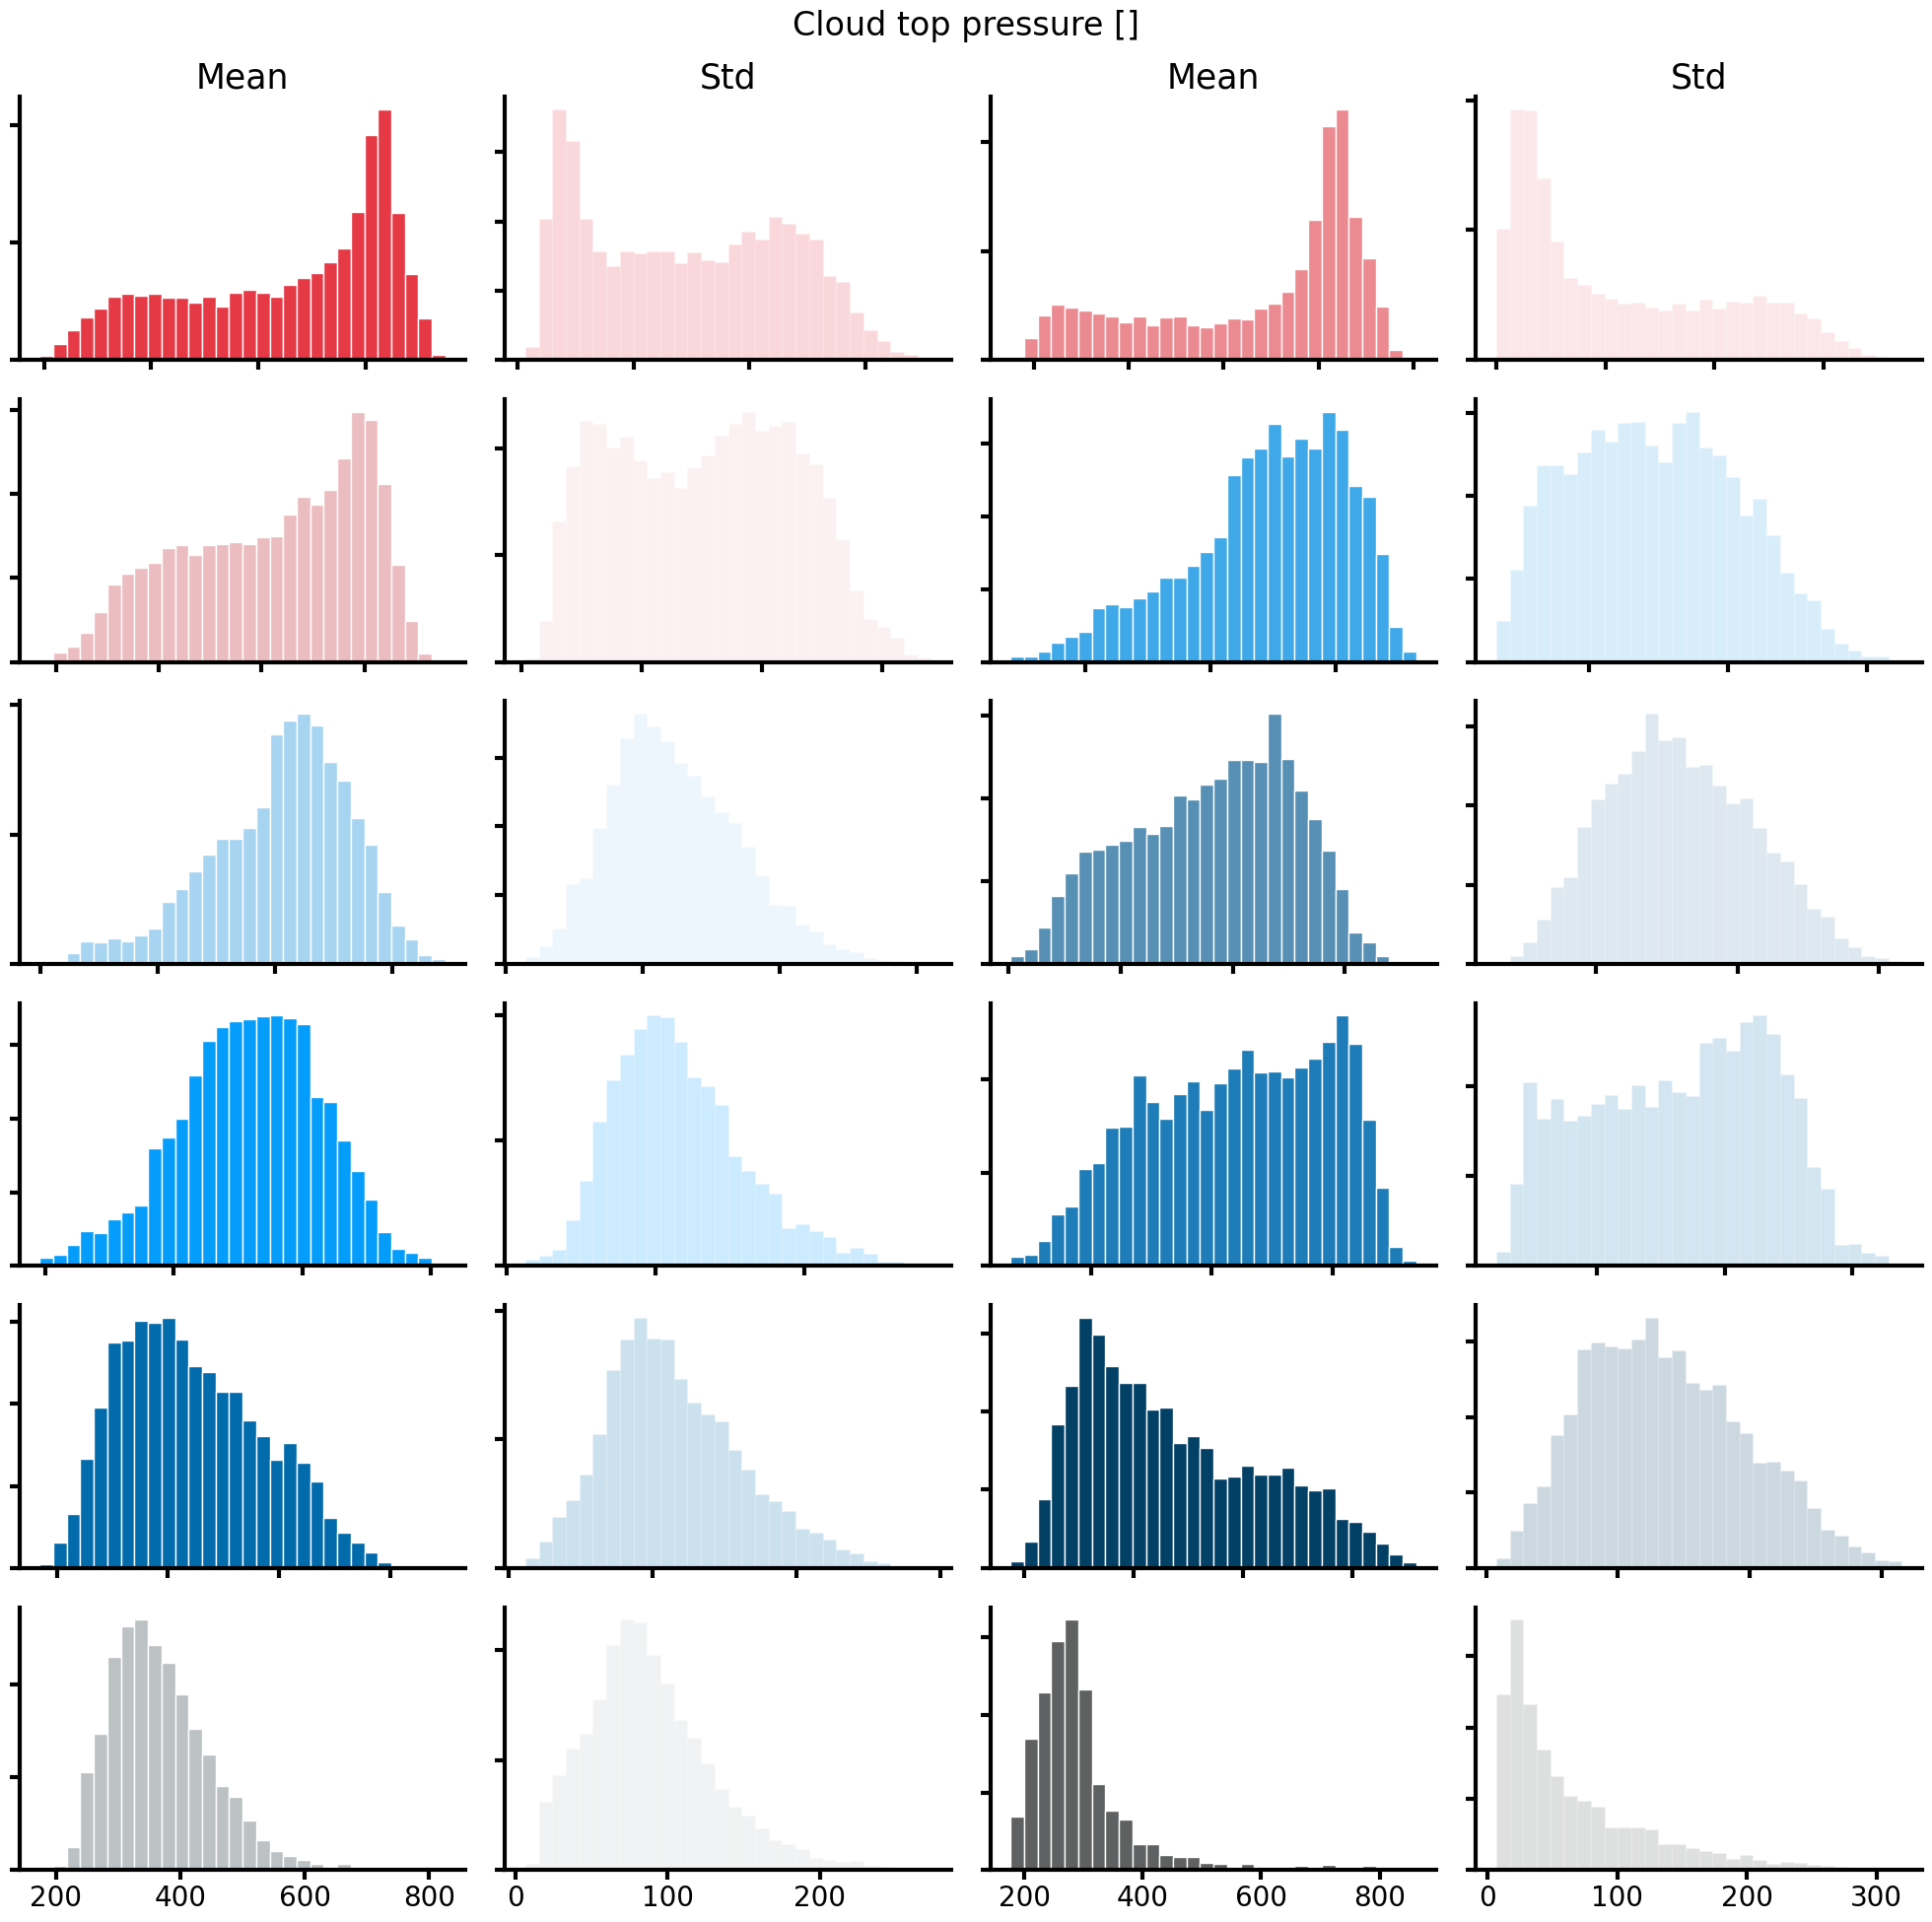

In [138]:
# plot distributions for the different classes for specific variables
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
plt.gcf().subplots_adjust(bottom=0.1)
path_out = path_to_csv
dict_plot_settings = {
        'labelsizeaxes':20,
        'fontSizeTitle':20,
        'fontSizeX'    :20,
        'fontSizeY'    :20,
        'cbarAspect'   :20,
        'fontSizeCbar' :20,
        'rcparams_font':['Tahoma'],
        'savefig_dpi'  :100,
        'font_size'    :20, 
        'grid'         :True}
labelsizeaxes   = dict_plot_settings['labelsizeaxes']
fontSizeTitle   = dict_plot_settings['fontSizeTitle']
fontSizeX       = dict_plot_settings['fontSizeX']
fontSizeY       = dict_plot_settings['fontSizeY']
cbarAspect      = dict_plot_settings['cbarAspect']
fontSizeCbar    = dict_plot_settings['fontSizeCbar']
plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
grid = dict_plot_settings['grid']
#matplotlib.rc('xtick', labelsize=dict_plot_settings['font_size'])  # sets dimension of ticks in the plots
#matplotlib.rc('ytick', labelsize=dict_plot_settings['font_size']) # sets dimension of ticks in the plots
plt.yticks(color='w')
fig.suptitle('Cloud top pressure []')
def f_plot_rows(class_left, class_right, var_name, ind_row, color_left, color_right, nbins):
    
    '''function to plot histogram rows for the selected variable
    input:
    class_left: class dataset to plot on the first 2 columns
    class_right: class dataset to plot on the second 2 columns
    ind_row: index of the rows 
    var_name: name of the variable to be plotted (string, like cth, see for more info)
    color_left: hex code for color of the class on the left of the row
    color_right: hex code for color of the class on the right of the row
    '''
    if ind_row == 0:
        axs[ind_row,0].set_title( 'Mean', size = 25)
        axs[ind_row,1].set_title( 'Std', size = 25)
        axs[ind_row,2].set_title( 'Mean', size = 25)
        axs[ind_row,3].set_title( 'Std', size = 25)


    
    #selecting values from 
    mean = class_left[var_name+'_mean'].values[~np.isnan(class_left[var_name+'_mean'].values)]
    std = class_left[var_name+'_std'].values[~np.isnan(class_left[var_name+'_std'].values)]
    
    # first row of plots
    axs[ind_row,0].hist(mean, bins = nbins,
                 color = color_left, edgecolor = 'white', density=True)
    axs[ind_row,0].axes.yaxis.set_ticklabels([])
    
    #axs[ind_row,0].yaxis.set_major_formatter(PercentFormatter(xmax=0.5))
    
    axs[ind_row,1].hist(std, bins = nbins,
                 color = color_left, edgecolor = 'white', density=True, alpha=0.2)
    axs[ind_row,1].axes.yaxis.set_ticklabels([])

    mean = class_right[var_name+'_mean'].values[~np.isnan(class_right[var_name+'_mean'].values)]
    std = class_right[var_name+'_std'].values[~np.isnan(class_right[var_name+'_std'].values)]
        
    axs[ind_row,2].hist(mean, bins = nbins,
                 color = color_right, edgecolor = 'white', density=True)
    axs[ind_row,2].axes.yaxis.set_ticklabels([])

    axs[ind_row,3].hist(std, bins = nbins,
                 color = color_right, edgecolor = 'white', density=True, alpha=0.2)
    axs[ind_row,3].axes.yaxis.set_ticklabels([])
    if ind_row != 5:
        axs[ind_row,3].axes.xaxis.set_ticklabels([])
        axs[ind_row,2].axes.xaxis.set_ticklabels([])
        axs[ind_row,1].axes.xaxis.set_ticklabels([])
        axs[ind_row,0].axes.xaxis.set_ticklabels([])

    for ind_r in range(0,6):
        for ind_c in range(0,4):
            axs[ind_r,ind_c].spines["top"].set_visible(False)
            axs[ind_r,ind_c].spines["right"].set_visible(False)
            axs[ind_r,ind_c].spines["bottom"].set_linewidth(3)
            axs[ind_r,ind_c].spines["left"].set_linewidth(3)
            axs[ind_r,ind_c].tick_params(which='minor', length=5, width=2)
            axs[ind_r,ind_c].tick_params(which='major', length=7, width=3)
        

    return()
f_plot_rows(class_8, class_10, 'ctp', 0, Dict_classes['color_8'], Dict_classes['color_10'], 30)
f_plot_rows(class_7, class_12, 'ctp', 1, Dict_classes['color_7'], Dict_classes['color_12'], 30)
f_plot_rows(class_5, class_9, 'ctp', 2, Dict_classes['color_5'], Dict_classes['color_9'], 30)
f_plot_rows(class_1, class_4, 'ctp', 3, Dict_classes['color_1'], Dict_classes['color_4'], 30)
f_plot_rows(class_11, class_2, 'ctp', 4, Dict_classes['color_11'], Dict_classes['color_2'], 30)
f_plot_rows(class_6, class_3, 'ctp', 5, Dict_classes['color_6'], Dict_classes['color_3'], 30)

fig.tight_layout()
figure_name = path_out+'ctp_classes_histograms.png'
plt.savefig(figure_name, bbox_inches='tight', transparent=True)